**EXERCÍCIO 1**: explorar ofertas relâmpago.

Objetivo: realizar uma análise exploratória (EDA) buscando insights sobre o conjunto de ofertas apresentado.

**ESCLARECIMENTOS**: para facilitar a leitura, acompanhamento e avaliação do trabalho, foram tomadas as seguintes decisões
1. Código: para a avaliação do código utilizado para manipulação dos dados, extração de informações e criação das visualizações, foi decidido abrir mão de métodos de funcionalização e modularização, deixando todo o código explícito.
2. Seção *4.0 RESUMO DE INSIGHTS*: neste capítulo foram agrupados os insights presentes no fluxo da exploração, para olhar geral e fácil recapitulação.

Durante todo o fluxo do trabalho foram criados insights, questões e comentários. Para facilitar, foi utilizado o seguinte padrão:

<span style="color:red">**QUESTÃO**</span>: questões levantadas durante o processo de análise e exploração. Em uma situação real, seriam levadas para o stakeholder ou solicitante.

<span style="color:blue">**PRÓXIMO PASSO**</span>: ideias que poderiam ser testadas nos próximos ciclos de exploração.

<span style="color:purple">**INFO**</span>: conclusões geradas a partir da análise dos dados. Não classificadas como insight por não terem caráter acionável.

<span style="color:green">**INSIGHT**</span>: conclusões, com caráter acionável, geradas a partir da análise dos dados.

# 0.0 IMPORTAÇÕES E DEFINIÇÕES

## 1.0 Importação de Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt

from matplotlib import pyplot as plt
from matplotlib import lines

## 2.0 Definições Auxiliares

In [2]:
# caminho completo de localização do arquivo .csv
FILE_PATH = '../data/ofertas_relampago.csv'

## 3.0 Carregamento dos Dados

In [3]:
# leitura do arquivo .csv
dataframe = pd.read_csv(FILE_PATH)
dataframe.head()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES


# 1.0 DESCRIÇÃO DOS DADOS

Descrição dos parâmetros:

- `OFFER_START_DATE`: data de início da oferta (formato YYYY-MM-DD)
- `OFFER_START_DTTM`: data de início da oferta (formato YYYY-MM-DD HH:mm:ss)
- `OFFER_FINISH_DTTM`: data de encerramento da oferta (formato YYYY-MM-DD HH:mm:ss)
- `OFFER_TYPE`: tag do tipo da oferta
- `INVOLVED_STOCK`: quantidade de itens disponibilizados para a ação
- `RAMAINING_STOCK_AFTER_END`: quantidade de itens restantes após o final da ação
- `SOLD_AMOUNT`: receita gerada com a venda dos itens das ofertas
- `SOLD_QUANTITY`: quantidade de itens vendidos durante a ação
- `ORIGIN`: relacionado ao tipo de vendedor
- `SHIPPING_PAYMENT_TYPE`: tipo de envio
- `DOM_DOMAIN_AGG1`: departamento do produto
- `VERTICAL`: vertical do produto
- `DOMAIN_ID`: descrição mais detalhada do produto (3 primeiras letras são relacionadas ao país de origem da oferta)

## 1.1 Dimensão dos Dados

In [4]:
raw_rows, raw_columns = dataframe.shape

print('Número inicial de linhas: {}'.format(raw_rows))
print('Número inicial de colunas: {}'.format(raw_columns))

Número inicial de linhas: 48746
Número inicial de colunas: 13


## 1.2 Tipos de Dados e Valores Faltantes

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OFFER_START_DATE           48746 non-null  object 
 1   OFFER_START_DTTM           48746 non-null  object 
 2   OFFER_FINISH_DTTM          48746 non-null  object 
 3   OFFER_TYPE                 48746 non-null  object 
 4   INVOLVED_STOCK             48746 non-null  int64  
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64  
 6   SOLD_AMOUNT                24579 non-null  float64
 7   SOLD_QUANTITY              24579 non-null  float64
 8   ORIGIN                     11316 non-null  object 
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object 
 10  DOM_DOMAIN_AGG1            48746 non-null  object 
 11  VERTICAL                   48746 non-null  object 
 12  DOMAIN_ID                  48746 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usag

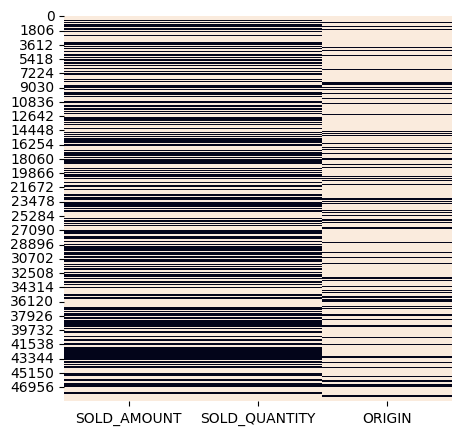

In [6]:
# criação de mapa de calor para verificação dos dados faltantes
fig = plt.figure(figsize=(5,5))
sns.heatmap(
    dataframe[['SOLD_AMOUNT', 'SOLD_QUANTITY', 'ORIGIN']].isna(),
    cbar=False
)
plt.show()

As colunas com **valores faltantes** são:
- `SOLD_AMOUNT`: 24167 registros null
- `SOLD_QUANTITY`: 24167 registros null
- `ORIGIN`: 37430 registros null

São necessários **ajustes do tipo de dados** nas seguintes colunas:
- `OFFER_START_DATE`: object &rarr; datetime
- `OFFER_START_DTTM`: object &rarr; datetime
- `OFFER_END_DTTM`: object &rarr; datetime
- `SOLD_QUANTITY`: float64 &rarr; int64

## 1.3 Limpeza e Adequação dos Dados

### 1.3.1 Registros duplicados

É importante conferir a existência de registros duplicados. Como não há um código de identificação dos itens, a conferência será feita a partir de todas as colunas, para garantir que não há variação de datas e quantidades.

In [7]:
# verificação de amostra dos registros duplicados
dataframe[dataframe.duplicated()].sample(5)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
8113,2021-07-07,2021-07-07 11:00:00+00:00,2021-07-07 19:00:00+00:00,lightning_deal,30,30,NaN,NaN,A,free_shipping,BABY,T & B,MLM-BABY_STROLLERS
37666,2021-07-22,2021-07-22 07:00:00+00:00,2021-07-22 13:00:01+00:00,lightning_deal,15,15,NaN,NaN,NaN,free_shipping,INDUSTRY,HOME & INDUSTRY,MLM-SAFETY_FOOTWEAR
14161,2021-07-09,2021-07-09 11:00:00+00:00,2021-07-09 18:00:00+00:00,lightning_deal,29,29,NaN,NaN,A,none,ELECTRONICS,CE,MLM-WASHING_MACHINES
1486,2021-07-08,2021-07-08 19:00:00+00:00,2021-07-09 03:00:00+00:00,lightning_deal,8,8,NaN,NaN,A,free_shipping,TOYS AND GAMES,T & B,MLM-ACTION_FIGURES
16917,2021-07-24,2021-07-24 12:00:00+00:00,2021-07-24 20:00:00+00:00,lightning_deal,8,8,NaN,NaN,A,free_shipping,APPAREL ACCESORIES,APP & SPORTS,MLM-SUNGLASSES


In [8]:
duplicates = dataframe[dataframe.duplicated()].shape[0]
print('Quantidade de registros duplicados: {} ({:.1%} da base total)'.format(duplicates, duplicates/raw_rows))

Quantidade de registros duplicados: 926 (1.9% da base total)


<span style="color:red">**QUESTÃO**</span>: a existência de registros duplicados poderia ser causada por falha no carregamento/consulta dos dados? Caso o erro seja durante o processo de carregamento, a utilização de um código único de identificação evitaria a duplicação dos registros?

Para evitar a contaminação com **possíveis** dados duplicados durante o processo de análise, estes registros serão removidos (mantendo-se apenas o que tiver a primeira aparição na base de dados).

In [9]:
# remoção dos registros duplicados
dataframe.drop_duplicates(
    keep='first',
    inplace=True
)

print('Dimensão do dataframe atual: {}'.format(dataframe.shape))

Dimensão do dataframe atual: (47820, 13)


### 1.3.2 `SOLD_AMOUNT` e `SOLD_QUANTITY` x `INVOLVED_STOCK` e `REMAINING_STOCK_AFTER_END`

Os valores faltantes das colunas `SOLD_AMOUNT` e `SOLD_QUANTITY` são referentes aos mesmos registros (conforme observado no heatmap da seção *1.2 Data Types and Missing Values*), o que pode indicar a existência de produtos que não foram vendidos durante o período da oferta.

Contudo, é necessário verificar se nos registros que supostamente não apresentaram vendas durante o período da oferta (`SOLD_AMOUNT` e `SOLD_QUANTITY` null) a quantidade de itens disponibilizados para a oferta (`INVOLVED_STOCK`) é igual a quantidade de itens restantes após o final da oferta (`REMAINING_STOCK_AFTER_END`).

In [10]:
# verificação de amostra de registros sem quantidade de venda | receita
dataframe[
    (dataframe['SOLD_AMOUNT'].isnull()) &
    (dataframe['SOLD_QUANTITY'].isnull())
].sample(5)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
44075,2021-07-12,2021-07-12 13:00:00+00:00,2021-07-12 13:13:41+00:00,lightning_deal,15,15,NaN,NaN,A,none,HOME&DECOR,HOME & INDUSTRY,MLM-LIGHT_BULBS
15665,2021-06-03,2021-06-03 19:00:00+00:00,2021-06-03 19:00:00+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,TOOLS AND CONSTRUCTION,HOME & INDUSTRY,MLM-IMPACT_WRENCHES
10932,2021-07-27,2021-07-27 07:00:00+00:00,2021-07-27 13:00:05+00:00,lightning_deal,15,15,NaN,NaN,NaN,none,AUTOPARTS,ACC,MLM-VEHICLE_LED_BULBS
3142,2021-06-12,2021-06-12 13:00:00+00:00,2021-06-12 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,SPORTS,APP & SPORTS,MLM-THERMOSES
1191,2021-07-08,2021-07-08 19:00:00+00:00,2021-07-09 01:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,none,SPORTS,APP & SPORTS,MLM-SPORT_SHORTS


In [11]:
# verificação de amostra de registros sem quantidade de venda | receita e com quantidade incoerente de estoque
dataframe[
    (dataframe['SOLD_AMOUNT'].isnull()) &
    (dataframe['SOLD_QUANTITY'].isnull()) &
    (dataframe['REMAINING_STOCK_AFTER_END'] != dataframe['INVOLVED_STOCK'])
].sample(5)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
2476,2021-06-02,2021-06-02 13:00:00+00:00,2021-06-02 15:09:12+00:00,lightning_deal,5,0,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-COMPUTER_MICE
23713,2021-07-31,2021-07-31 07:00:00+00:00,2021-07-31 13:00:02+00:00,lightning_deal,5,3,NaN,NaN,NaN,free_shipping,BABY,T & B,MLM-BABY_STROLLERS
2951,2021-06-12,2021-06-12 16:00:00+00:00,2021-06-13 00:00:00+00:00,lightning_deal,10,7,NaN,NaN,A,free_shipping,ELECTRONICS,CE,MLM-FANS
16785,2021-07-24,2021-07-24 12:00:00+00:00,2021-07-24 20:00:01+00:00,lightning_deal,12,9,NaN,NaN,A,free_shipping,ELECTRONICS,CE,MLM-TELEVISIONS
11635,2021-07-27,2021-07-27 17:00:00+00:00,2021-07-28 00:00:00+00:00,lightning_deal,300,299,NaN,NaN,A,free_shipping,MOBILE,CE,MLM-CELLPHONES


In [12]:
not_sold = dataframe[
    (dataframe['SOLD_AMOUNT'].isnull()) &
    (dataframe['SOLD_QUANTITY'].isnull())
].shape[0]

not_sold_error_stock = dataframe[
    (dataframe['SOLD_AMOUNT'].isnull()) &
    (dataframe['SOLD_QUANTITY'].isnull()) &
    (dataframe['REMAINING_STOCK_AFTER_END'] != dataframe['INVOLVED_STOCK'])
].shape[0]

print('Quantidade total de registros sem venda: {} ({:.1%} da base total)'.format(not_sold, not_sold/raw_rows))
print('Quantidade total de registros sem venda e com consistência de estoque: {} ({:.1%} da base total)'.format((not_sold - not_sold_error_stock), (not_sold - not_sold_error_stock)/raw_rows))
print('Quantidade total de registros sem venda e com inconsistência de estoque: {} ({:.1%} da base total)'.format(not_sold_error_stock, not_sold_error_stock/raw_rows))

Quantidade total de registros sem venda: 23272 (47.7% da base total)
Quantidade total de registros sem venda e com consistência de estoque: 22738 (46.6% da base total)
Quantidade total de registros sem venda e com inconsistência de estoque: 534 (1.1% da base total)


Dos 23272 registros com valores faltanes para os parâmetros `SOLD_AMOUNT` e `SOLD_QUANTITY` 22738 possuem `REMAINING_STOCK_AFTER_END` igual a `INVOLVED_STOCK`, o que indica que não houveram itens vendidos durante o período da campanha. Para esses casos, os falores faltantes podem ser preenchidos por zero.

Os outros 534 registros apresentam valores de `REMAINING_STOCK_AFTER_END` diferente de `INVOLVED_STOCK`. Para esses registros, os valores faltantes de `SOLD_QUANTITY` poderiam ser preenchidos por uma simples diferença entre as quantidades inicial e final dos itens. Contudo, ainda não seria possível preencher os valores faltantes de `SOLD_AMOUNT` de forma direta, uma vez que não foi disponibilizado o valor unitário de cada item. Para garantir assertividade nas informações disponíveis para o processo de análise, esses registros serão desconsiderados. 

<span style="color:red">**QUESTÃO**</span>: a existência dos registros descritos no segundo caso seria por erro no controle do registro de vendas ou do controle de estoque, é possível descriminar a causa?

<span style="color:blue">**PRÓXIMO PASSO**</span>: uma possível alternativa para esse segundo caso seria utilizar o valor unitário médio (`SOLD_AMOUNT`/`SOLD_QUANTITY`) de itens com os mesmos valores para os parâmetros [`DOM_DOMAIN_AGG1`, `VERTICAL`, `DOMAIN_ID`].

In [13]:
# remoção dos registros sem venda e com inconsistência de estoque
dataframe.drop(
    dataframe[
        (dataframe['SOLD_AMOUNT'].isnull()) &
        (dataframe['SOLD_QUANTITY'].isnull()) &
        (dataframe['REMAINING_STOCK_AFTER_END'] != dataframe['INVOLVED_STOCK'])
    ].index,
    axis=0,
    inplace=True
)

# preenchimento dos valores faltantes de `SOLD_AMOUNT` e `SOLD_QUANTITY`
dataframe.fillna(
    value={
        'SOLD_AMOUNT': 0,
        'SOLD_QUANTITY': 0
    },
    inplace=True
)

In [14]:
print('Dimensão do dataframe atual: {}'.format(dataframe.shape))

Dimensão do dataframe atual: (47286, 13)


### 1.3.3 Valores negativos de `REMAINING_STOCK_AFTER_END`

A partir do ponto explorado na seção anterior, nota-se a presença de valores negativos para o parâmetro `REMAINING_STOCK_AFTER_END`. É importante entender a volumetria de registros nestas condições.

In [15]:
# verificação de amostra de registros com valores negativos de estoque remanescente e consistência na relação `INVOLVED_STOCK` - `REMAINING_STOCK_AFTER_END` = `SOLD_QUANTITY`
dataframe[
    (dataframe['REMAINING_STOCK_AFTER_END']<0) &
    ((dataframe['INVOLVED_STOCK'] - dataframe['REMAINING_STOCK_AFTER_END'])==dataframe['SOLD_QUANTITY'])
].sample(5)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
17656,2021-07-10,2021-07-10 13:00:00+00:00,2021-07-10 16:50:53+00:00,lightning_deal,15,-2,32.75,17.0,NaN,none,AUTOPARTS,ACC,MLM-AUTOMOTIVE_LED_LIGHT_BARS
27408,2021-06-24,2021-06-24 19:00:00+00:00,2021-06-24 23:07:17+00:00,lightning_deal,5,-1,11.64,6.0,NaN,free_shipping,APPAREL,APP & SPORTS,MLM-SWEATSHIRTS_AND_HOODIES
20284,2021-07-14,2021-07-14 13:00:00+00:00,2021-07-14 18:20:02+00:00,lightning_deal,5,-1,101.96,6.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-COMFORTERS
11120,2021-07-27,2021-07-27 19:00:00+00:00,2021-07-27 20:24:50+00:00,lightning_deal,5,-13,37.95,18.0,NaN,none,PARTY,T & B,MLM-SOUVENIRS
47742,2021-07-06,2021-07-06 13:00:00+00:00,2021-07-06 14:00:38+00:00,lightning_deal,5,-3,11.59,8.0,NaN,none,TOYS AND GAMES,T & B,MLM-BOARD_GAMES


In [16]:
# verificação de amostra de registros com valores negativos de estoque remanescente e inconsistência na relação `INVOLVED_STOCK` - `REMAINING_STOCK_AFTER_END` = `SOLD_QUANTITY`
dataframe[
    (dataframe['REMAINING_STOCK_AFTER_END']<0) &
    ((dataframe['INVOLVED_STOCK'] - dataframe['REMAINING_STOCK_AFTER_END'])!=dataframe['SOLD_QUANTITY'])
].sample(5)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
28382,2021-07-21,2021-07-21 07:00:00+00:00,2021-07-21 12:26:55+00:00,lightning_deal,5,-1,6.52,4.0,NaN,none,PERSONAL HYGIENE,CPG,MLM-LIQUID_HAND_AND_BODY_SOAPS
39419,2021-07-29,2021-07-29 13:00:00+00:00,2021-07-29 18:00:33+00:00,lightning_deal,5,-1,89.06,2.0,NaN,free_shipping,ELECTRONICS,CE,MLM-HAIR_STRAIGHTENERS
16059,2021-06-23,2021-06-23 07:00:00+00:00,2021-06-23 12:50:59+00:00,lightning_deal,15,-1,29.01,14.0,NaN,none,HOME&DECOR,HOME & INDUSTRY,MLM-LUNCHBOXES
43201,2021-06-30,2021-06-30 12:00:00+00:00,2021-06-30 15:34:20+00:00,lightning_deal,96,-13,379.67,89.0,A,none,BEAUTY EQUIPMENT,BEAUTY & HEALTH,MLM-DISPOSABLE_GLOVES
48099,2021-06-19,2021-06-19 15:00:00+00:00,2021-06-19 18:54:12+00:00,lightning_deal,8,-1,5.11,2.0,A,none,PETS FOOD,CPG,MLM-CATS_AND_DOGS_FOODS


In [17]:
negative_stock = dataframe[dataframe['REMAINING_STOCK_AFTER_END']<0].shape[0]

negative_error_stock = dataframe[
    (dataframe['REMAINING_STOCK_AFTER_END']<0) &
    ((dataframe['INVOLVED_STOCK'] - dataframe['REMAINING_STOCK_AFTER_END'])!=dataframe['SOLD_QUANTITY'])
].shape[0]

print('Quantidade total de registros com estoque negativo: {} ({:.1%} da base total)'.format(negative_stock, negative_stock/raw_rows))
print('Quantidade total de registros com estoque negativo e consistência no estoque: {} ({:.1%} da base total)'.format((negative_stock - negative_error_stock), (negative_stock - negative_error_stock)/raw_rows))
print('Quantidade total de registros com estoque negativo e inconsistência no estoque: {} ({:.1%} da base total)'.format(negative_error_stock, negative_error_stock/raw_rows))

Quantidade total de registros com estoque negativo: 1240 (2.5% da base total)
Quantidade total de registros com estoque negativo e consistência no estoque: 1035 (2.1% da base total)
Quantidade total de registros com estoque negativo e inconsistência no estoque: 205 (0.4% da base total)


Dentre estes registros com estoque negativo, 1035 possui consistência na relação `INVOLVED_STOCK` - `REMAINING_STOCK_AFTER_END` = `SOLD_QUANTITY`, sendo o valor negativo da quantidade itens remanescentes o único problema da questão.

Os demais 205 registros possui uma relação não consistente entre os parâmetros citados acima.

<span style="color:red">**QUESTÃO**</span>: a existência dos registros descritos acima seria por erro no controle do registro de vendas, erro do controle de estoque ou ainda pela possibilidade da venda de uma quantidade de itens maior do que aquela disponibilizada para ação. Seria possível descriminar a causa? Qual a política adotada pela empresa em casos como o último descrito?

In [18]:
# remoção de registros com valores negativos de estoque remanescente
dataframe.drop(
    dataframe[(dataframe['REMAINING_STOCK_AFTER_END']<0)].index,
    axis=0,
    inplace=True
)

In [19]:
print('Dimensão do dataframe atual: {}'.format(dataframe.shape))

Dimensão do dataframe atual: (46046, 13)


### 1.3.4 Relação inconsistentes entre `INVOLVED_STOCK`, `REMAINING_STOCK_AFTER_END` e `SOLD_QUANTITY`

É importante verificar a existência de registros que não obedeçam a relação `INVOLVED_STOCK` - `SOLD_QUANTITY` = `REMAINING_STOCK_AFTER_END`, entendendo o impacto da volumetria destes registro na base total.

In [20]:
# verificaçãod e amostra de registros com relação inconsistente de `INVOLVED_STOCK` - `REMAINING_STOCK_AFTER_END` = `SOLD_QUANTITY`
dataframe[(dataframe['INVOLVED_STOCK'] - dataframe['REMAINING_STOCK_AFTER_END']) != dataframe['SOLD_QUANTITY']].sample(5)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
26594,2021-06-17,2021-06-17 13:00:00+00:00,2021-06-17 20:00:00+00:00,lightning_deal,138,41,299.35,103.0,A,none,PHARMACEUTICS,BEAUTY & HEALTH,MLM-SURGICAL_AND_INDUSTRIAL_MASKS
43211,2021-06-30,2021-06-30 12:00:00+00:00,2021-06-30 20:00:01+00:00,lightning_deal,4000,3920,595.93,214.0,A,none,PHARMACEUTICS,BEAUTY & HEALTH,MLM-SURGICAL_AND_INDUSTRIAL_MASKS
43196,2021-06-30,2021-06-30 19:00:00+00:00,2021-07-01 01:00:03+00:00,lightning_deal,15,12,10.20,4.0,NaN,none,PERSONAL CARE,BEAUTY & HEALTH,MLM-MANICURE_AND_PEDICURE_SUPPLIES
19762,2021-07-14,2021-07-14 19:00:00+00:00,2021-07-15 01:00:05+00:00,lightning_deal,15,7,24.37,9.0,NaN,none,SPORTS,APP & SPORTS,MLM-SPORT_SHORTS
32767,2021-07-15,2021-07-15 13:00:00+00:00,2021-07-15 20:00:01+00:00,lightning_deal,965,899,1602.34,575.0,A,none,PHARMACEUTICS,BEAUTY & HEALTH,MLM-SURGICAL_AND_INDUSTRIAL_MASKS


In [21]:
error_stock = dataframe[(dataframe['INVOLVED_STOCK'] - dataframe['REMAINING_STOCK_AFTER_END']) != dataframe['SOLD_QUANTITY']].shape[0]

print('Quantidade total de registros com inconsistência de estoque: {} ({:.1%} da base total)'.format(error_stock, error_stock/raw_rows))

Quantidade total de registros com inconsistência de estoque: 2771 (5.7% da base total)


Como observado, 2771 possui inconsistência na relação `INVOLVED_STOCK` - `REMAINING_STOCK_AFTER_END` = `SOLD_QUANTITY`.

Estes registros serão desconsiderados para a etapa de análise, uma vez que e a causa dos problemas pode ser tanto o registro de vendas quanto o controle de estoque, dificultanto a criação de uma estratégia de correção.

<span style="color:red">**QUESTÃO**</span>: qual a política adotada pela empresa em casos como os observados nesta seção?

In [22]:
# remoção de registros com relação inconsistente de `INVOLVED_STOCK` - `REMAINING_STOCK_AFTER_END` = `SOLD_QUANTITY`
dataframe.drop(
    dataframe[(dataframe['INVOLVED_STOCK'] - dataframe['REMAINING_STOCK_AFTER_END']) != dataframe['SOLD_QUANTITY']].index,
    axis=0,
    inplace=True
)

In [23]:
print('Dimensão do dataframe atual: {}'.format(dataframe.shape))

Dimensão do dataframe atual: (43275, 13)


### 1.3.5 Valores faltantes de `ORIGIN`

Nota-se que 37430 registros possuem valor null para o parâmetro `ORIGIN`. Foi observado que este parâmetro apresenta apenas o valor 'A' (verificar na sessão *1.4.2 Categorical attributes*) para os registros não-faltantes, não fornecendo informações suficientes para o preenchimento assertivo.

Por motivos de completude dos dados, os valores null serão preenchidos com a string 'UNK' (unknown)

In [24]:
# preenchimento de valores faltantes do parâmetro `ORIGIN`
dataframe['ORIGIN'].fillna(
    'UNK',
    inplace=True
)

In [25]:
print('Dimensão do dataframe atual: {}'.format(dataframe.shape))

Dimensão do dataframe atual: (43275, 13)


### 1.3.6 Registros com `OFFER_START_DTTM` igual a `OFFER_FINISH_DTTM`

É importante verificar a existência de registros sem tempo hábil de duração da oferta, ou seja, com tempo de início (`OFFER_START_DTTM`) igual ao tempo de encerramento (`OFFER_FINISH_DTTM`).

In [26]:
# verificação de amostra de registros com `OFFER_START_DTTM` = `OFFER_FINISH_DTTM`
dataframe[dataframe['OFFER_START_DTTM']==dataframe['OFFER_FINISH_DTTM']].sample(5)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
35044,2021-07-05,2021-07-05 07:00:00+00:00,2021-07-05 07:00:00+00:00,lightning_deal,10,10,0.0,0.0,UNK,free_shipping,PERSONAL CARE,BEAUTY & HEALTH,MLM-BEAUTY_AND_PERSONAL_CARE_SUPPLIES
31202,2021-07-11,2021-07-11 13:00:00+00:00,2021-07-11 13:00:00+00:00,lightning_deal,15,15,0.0,0.0,UNK,free_shipping,AUTOPARTS,ACC,MLM-CAR_LIGHT_BULBS
39939,2021-06-01,2021-06-01 19:00:00+00:00,2021-06-01 19:00:00+00:00,lightning_deal,5,5,0.0,0.0,UNK,free_shipping,ANTIQUES & HOBBIES,OTHERS,MLM-ANTIQUE_BELLS
30949,2021-07-11,2021-07-11 07:00:00+00:00,2021-07-11 07:00:00+00:00,lightning_deal,12,12,0.0,0.0,UNK,none,PHARMACEUTICS,BEAUTY & HEALTH,MLM-OIL_DIFFUSERS
12881,2021-07-30,2021-07-30 07:00:00+00:00,2021-07-30 07:00:00+00:00,lightning_deal,5,5,0.0,0.0,UNK,free_shipping,PARTY,T & B,MLM-BALLOONS


In [27]:
same_start_finish = dataframe[dataframe['OFFER_START_DTTM']==dataframe['OFFER_FINISH_DTTM']].shape[0]

print('Quantidade total de registros com mesmo momento de criação e encerramento da ação: {} ({:.1%} da base total)'.format(same_start_finish, same_start_finish/raw_rows))

Quantidade total de registros com mesmo momento de criação e encerramento da ação: 1271 (2.6% da base total)


Nota-se que 1271 registros possui o tempo de início da ação (`OFFER_START_DTTM`) igual ao tempo de encerramento da ação (`OFFER_FINISH_DTTM`) não havendo tempo hábil para realização de vendas.

Considerando que estes registros não fornecerão ganho de informação durante a etapa de análise, os mesmos serão desconsiderados.

<span style="color:red">**QUESTÃO**</span>: os erros descritos acima são causados por erro na configuração da campanha?

In [28]:
# remoção de registros com `OFFER_START_DTTM` = `OFFER_FINISH_DTTM`
dataframe.drop(
    dataframe[dataframe['OFFER_START_DTTM']==dataframe['OFFER_FINISH_DTTM']].index,
    axis=0,
    inplace=True
)

In [29]:
print('Dimensão do dataframe atual: {}'.format(dataframe.shape))

Dimensão do dataframe atual: (42004, 13)


### 1.3.7 Correção dos tipos de dados

Como visto na seção *1.2 Data Types and Missing Values*, os parâmetros `OFFER_START_DATE`, `OFFER_START_DTTM`, `OFFER_FINISH_DTTM` e `SOLD_QUANTITY` precisam passar por um ajuste dos tipos de dados contidos, conforme descrito na seção indicada.

Para o ajuste do tipo de dado das colunas `OFFER_START_DTTM` e `OFFER_END_DTTM` serão removidos os sufixos "+00:00" para evitar erros de conversão relacionados ao timezone.

(**Nota**: foi verificado que todos os registros possuem o mesmo sufixo.)

In [30]:
# remoção dos sufixos '+00:00' dos parâmetros `OFFER_START_DATE` e `OFFER_FINISH_DTTM`
dataframe['OFFER_START_DTTM'] = dataframe['OFFER_START_DTTM'].str.removesuffix("+00:00")
dataframe['OFFER_FINISH_DTTM'] = dataframe['OFFER_FINISH_DTTM'].str.removesuffix("+00:00")

# ajuste dos tipos de dados dos parâmetros citados
dataframe = dataframe.astype(
    {
        'OFFER_START_DATE': 'datetime64[ns]',
        'OFFER_START_DTTM': 'datetime64[ns]',
        'OFFER_FINISH_DTTM': 'datetime64[ns]',
        'SOLD_QUANTITY': 'int64'
    }
)

In [31]:
# verificando os tipos de dados ajustados
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42004 entries, 1 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OFFER_START_DATE           42004 non-null  datetime64[ns]
 1   OFFER_START_DTTM           42004 non-null  datetime64[ns]
 2   OFFER_FINISH_DTTM          42004 non-null  datetime64[ns]
 3   OFFER_TYPE                 42004 non-null  object        
 4   INVOLVED_STOCK             42004 non-null  int64         
 5   REMAINING_STOCK_AFTER_END  42004 non-null  int64         
 6   SOLD_AMOUNT                42004 non-null  float64       
 7   SOLD_QUANTITY              42004 non-null  int64         
 8   ORIGIN                     42004 non-null  object        
 9   SHIPPING_PAYMENT_TYPE      42004 non-null  object        
 10  DOM_DOMAIN_AGG1            42004 non-null  object        
 11  VERTICAL                   42004 non-null  object        
 12  DOMAIN_ID

### 1.3.8 Registros com `OFFER_START_DTTM` próximo a `OFFER_FINISH_DTTM`

Similar à discussão realizada da seção *1.3.6 Registros com `OFFER_START_DTTM` igual a `OFFER_FINISH_DTTM`* é importante verificar agora a existência de registros com tempo de início (`OFFER_START_DTTM`) *próximos* ao tempo de encerramento (`OFFER_FINISH_DTTM`).

Para este ponto, definiremos um tempo mínimo hábil para duração da oferta, que será igual a 1 minuto.

In [32]:
# definição de tempo mínimo viável para duração da oferta
min_time = dt.timedelta(minutes=1)

# verificação de amostra de registros com a diferença entre `OFFER_FINISH_DTTM` e `OFFER_START_DTTM` menor que o limite definido
dataframe[(dataframe['OFFER_FINISH_DTTM']-dataframe['OFFER_START_DTTM'])<=min_time].sample(5)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
10283,2021-07-17,2021-07-17 13:00:00,2021-07-17 13:00:05,lightning_deal,10,10,0.0,0,UNK,none,STATIONARY,HOME & INDUSTRY,MLM-MARKERS_AND_HIGHLIGHTERS
38748,2021-07-29,2021-07-29 19:00:00,2021-07-29 19:00:02,lightning_deal,10,10,0.0,0,UNK,free_shipping,APPAREL ACCESORIES,APP & SPORTS,MLM-KEYCHAINS
3849,2021-06-26,2021-06-26 07:00:00,2021-06-26 07:00:02,lightning_deal,15,15,0.0,0,UNK,none,BEAUTY EQUIPMENT,BEAUTY & HEALTH,MLM-HEALTH_CARE_SUPPLIES
42961,2021-07-02,2021-07-02 07:00:00,2021-07-02 07:00:02,lightning_deal,15,15,0.0,0,UNK,none,TOOLS AND CONSTRUCTION,HOME & INDUSTRY,MLM-DRILL_BITS
8678,2021-07-07,2021-07-07 19:00:00,2021-07-07 19:00:01,lightning_deal,10,10,0.0,0,UNK,free_shipping,MOBILE,CE,MLM-SMARTWATCHES


In [33]:
similar_start_finish = dataframe[(dataframe['OFFER_FINISH_DTTM']-dataframe['OFFER_START_DTTM'])<=min_time].shape[0]

print('Quantidade total de registros com momento similares de criação e encerramento da ação: {} ({:.1%} da base total)'.format(similar_start_finish, similar_start_finish/raw_rows))

Quantidade total de registros com momento similares de criação e encerramento da ação: 2429 (5.0% da base total)


Nota-se que 2429 registros possui o tempo de início da ação (`OFFER_START_DTTM`) muito próximo do tempo de encerramento da ação (`OFFER_FINISH_DTTM`) não havendo tempo hábil para realização de vendas.

Assim como na seção 1.3.6, estes registros serão desconsiderados para continuidade da análise.

<span style="color:red">**QUESTÃO**</span>: assim como questionado anteriormente, os erros descritos acima são causados por erro na configuração da campanha?

<span style="color:red">**QUESTÃO**</span>: como a empresa define um tempo de duração mínimo viável para cada oferta?

In [34]:
# remoção dos registros com a diferença entre `OFFER_FINISH_DTTM` e `OFFER_START_DTTM` menor que o limite definido
dataframe.drop(
    dataframe[(dataframe['OFFER_FINISH_DTTM']-dataframe['OFFER_START_DTTM'])<=min_time].index,
    axis=0,
    inplace=True
)

In [35]:
print('Número inicial de linhas: {}'.format(raw_rows))
print('O processo de limpeza e adequação removeu {} linhas ({:.1%} da base total)'.format(raw_rows - dataframe.shape[0], (raw_rows - dataframe.shape[0])/raw_rows))
print('Número de linhas após os processos de limpeza e adequação: {}'.format(dataframe.shape[0]))

Número inicial de linhas: 48746
O processo de limpeza e adequação removeu 9171 linhas (18.8% da base total)
Número de linhas após os processos de limpeza e adequação: 39575


## 1.4 Descrição Estatística

In [36]:
# separação dos parâmetros numéricos e categóricos (e datas)
num_att = dataframe.select_dtypes(include=['int64', 'float64'])
cat_att = dataframe.select_dtypes(exclude=['int64', 'float64'])

### 1.4.1 Atributos numéricos

In [37]:
# estimadores de localização
mean_ = pd.DataFrame(num_att.apply(np.mean)).T
median_ = pd.DataFrame(num_att.apply(np.median)).T
min_ = pd.DataFrame(num_att.apply(np.min)).T
max_ = pd.DataFrame(num_att.apply(np.max)).T

# estimadores de variabilidade
std_ = pd.DataFrame(num_att.apply(np.std)).T
range_ = pd.DataFrame(num_att.apply(lambda x: x.max() - x.min())).T

# skewness e kurtosis
skew_ = pd.DataFrame(num_att.apply(lambda x: x.skew())).T
kurt_ = pd.DataFrame(num_att.apply(lambda x: x.kurtosis())).T

# concatenação dos estimadores
num_stats = pd.concat([min_, max_, range_, mean_, median_, std_, skew_, kurt_]).T.reset_index(drop=False)
num_stats.columns = ['Attributes', 'Min', 'Max', 'Range', 'Mean', 'Median', 'Std','Skewness', 'Kurtosis']
num_stats

,Attributes,Min,Max,Range,Mean,Median,Std,Skewness,Kurtosis
0,INVOLVED_STOCK,1.0,8000.00,7999.00,23.189994,10.00,106.939562,28.897482,1443.619328
1,REMAINING_STOCK_AFTER_END,0.0,7035.00,7035.00,20.533847,8.00,100.965793,28.127794,1332.714835
2,SOLD_AMOUNT,0.0,4836.57,4836.57,16.588239,1.65,79.177143,21.157568,731.142216
3,SOLD_QUANTITY,0.0,1503.00,1503.00,2.656147,1.00,13.698896,50.756585,4451.307346


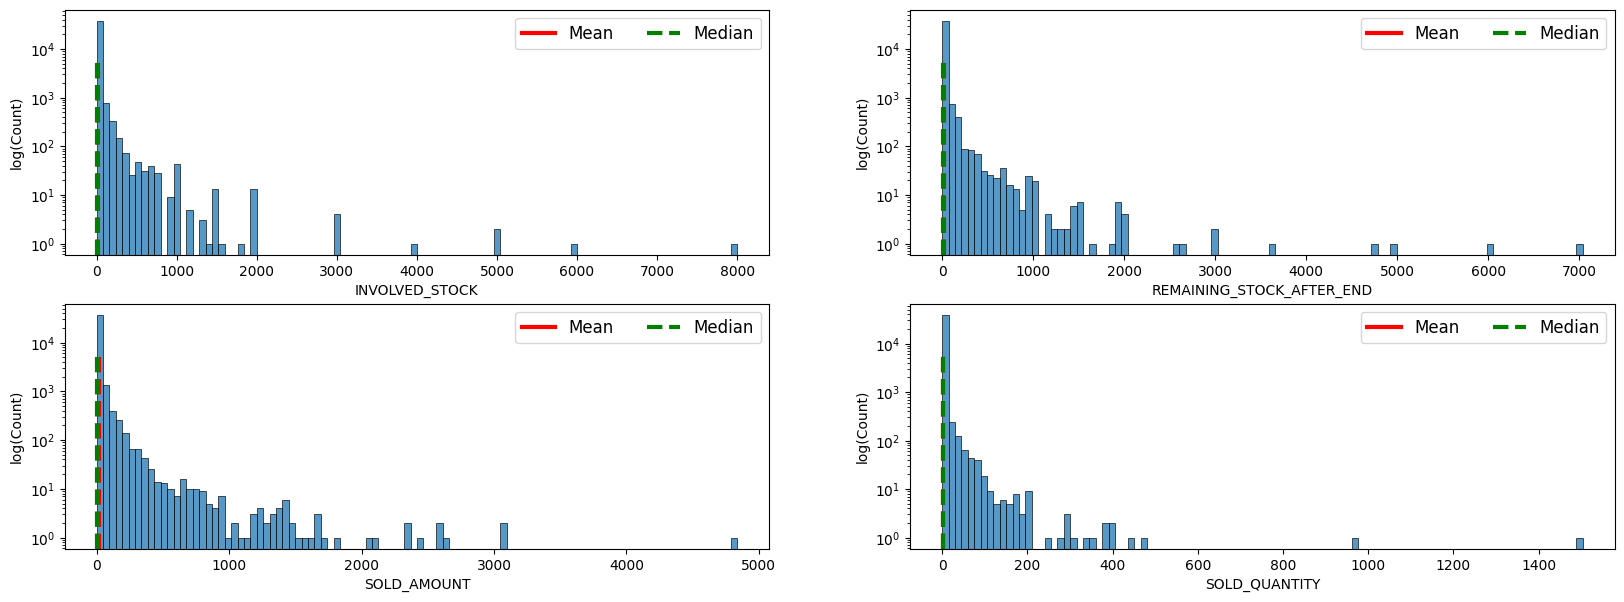

In [38]:
fig = plt.figure(figsize=(20, 7))
num_cols = num_att.columns

for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.histplot(
        data=dataframe,
        x=num_cols[i],
        bins=100
    )

    plt.yscale('log')
    plt.ylabel('log(Count)')

    plt.axvline(
        x=dataframe[num_cols[i]].mean(),
        color='red',
        ymax=0.8,
        lw=3,
        linestyle='--'
    )
    plt.axvline(
        x=dataframe[num_cols[i]].median(),
        color='green',
        ymax=0.8,
        lw=3,
        linestyle='--'
    )

    custom_legends = [
        lines.Line2D([0], [0], color='red', linestyle='-', lw=3),
        lines.Line2D([0], [0], color='green', linestyle='--', lw=3),
    ]
    plt.legend(
        custom_legends,
        ['Mean', 'Median'],
        loc='upper right',
        fontsize=12,
        ncols=2
    )

plt.show()

Nota-se distribuições assimétricas em todos os atributos numéricos, com uma maior concentração do lado esquerdo da curva (menores valores).

### 1.4.2 Categorical attributes

In [39]:
# verificação do número de valores únicos e share de contribuição de cada valor nos parâmetros categóricos
for col in cat_att.columns:
    print('Number of distinct {} values: {}'.format(col, len(dataframe[col].unique())))
    print(dataframe[col].value_counts())
    print('-------------------------------------------------------------------------- \n')

Number of distinct OFFER_START_DATE values: 61
OFFER_START_DATE
2021-07-30    1060
2021-07-08    1027
2021-07-29    1016
2021-07-28    1013
2021-07-31    1009
              ... 
2021-06-06     346
2021-06-07     321
2021-06-09     303
2021-06-08     257
2021-06-30     195
Name: count, Length: 61, dtype: int64
-------------------------------------------------------------------------- 

Number of distinct OFFER_START_DTTM values: 761
OFFER_START_DTTM
2021-07-30 13:00:00    348
2021-07-29 13:00:00    338
2021-07-28 13:00:00    326
2021-07-31 13:00:00    313
2021-07-28 07:00:00    301
                      ... 
2021-06-15 10:00:00      1
2021-06-15 03:00:00      1
2021-07-30 09:00:00      1
2021-07-01 20:00:00      1
2021-06-03 22:00:00      1
Name: count, Length: 761, dtype: int64
-------------------------------------------------------------------------- 

Number of distinct OFFER_FINISH_DTTM values: 5321
OFFER_FINISH_DTTM
2021-07-23 19:00:02    68
2021-07-06 13:00:01    68
2021-06-02 01:

Nota-se 61 diferentes datas de início de ofertas (`OFFER_START_DATE`), todas entre os meses 06 e 07 do ano de 2021.

O parâmetro `OFFER_TYPE` possui um único valor: "lightning_deal". Como a constância do valor não agregará no ganho de informação, esta coluno pode ser ignorada na etapa de análise.

O parâmetro `ORIGIN` possui um único valor não null: "A". Os valores null foram preenchidos por "UNK" (unknown), conforme apresentado na seção 1.3 Cleaning and Adequacy.

O parâmetro `SHIPPING_PAYMENT_TYPE` possui dois valores: "free_shipping" e "none". Vale entender com a empresa o significado do valor "none".

# 2.0 ENGENHARIA DE PARÂMETROS

## 2.1 `OFFER_TIME_DELTA`

Descrição: duração do período da campanha (em horas)

In [40]:
dataframe['OFFER_TIME_DELTA'] = dataframe.apply(lambda x: round((x['OFFER_FINISH_DTTM'] - x['OFFER_START_DTTM']).seconds/3600, 0), axis=1)
dataframe[['OFFER_START_DTTM', 'OFFER_FINISH_DTTM', 'OFFER_TIME_DELTA']].sample(5)

,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TIME_DELTA
29303,2021-06-10 19:00:00,2021-06-11 01:00:24,6.0
39256,2021-07-29 07:00:00,2021-07-29 19:02:39,12.0
2908,2021-06-12 13:00:00,2021-06-12 19:00:02,6.0
36982,2021-06-18 07:00:00,2021-06-18 13:00:04,6.0
3782,2021-06-26 13:00:00,2021-06-26 20:00:00,7.0


## 2.2 `OFFER_FINISH_DATE`

Descrição: data final da oferta, no formato "%Y-%m-%d"

In [41]:
dataframe['OFFER_FINISH_DATE'] = pd.to_datetime(dataframe['OFFER_FINISH_DTTM'].dt.strftime('%Y-%m-%d'))
dataframe[['OFFER_FINISH_DTTM', 'OFFER_FINISH_DATE']].sample(5)

,OFFER_FINISH_DTTM,OFFER_FINISH_DATE
32563,2021-07-16 01:00:02,2021-07-16
11940,2021-07-27 19:00:00,2021-07-27
27227,2021-07-02 01:00:00,2021-07-02
12434,2021-07-30 21:00:00,2021-07-30
44501,2021-06-30 01:00:04,2021-06-30


## 2.3 `OFFER_START_MONTH`

Descrição: nome do mês de início da oferta

In [42]:
dataframe['OFFER_START_MONTH'] = dataframe['OFFER_START_DATE'].dt.month_name()
dataframe[['OFFER_START_DATE', 'OFFER_START_MONTH']].sample(5)

,OFFER_START_DATE,OFFER_START_MONTH
16156,2021-06-23,June
32703,2021-07-15,July
23267,2021-07-31,July
6585,2021-06-16,June
27417,2021-06-24,June


## 2.4 `OFFER_START_WEEKDAY`

Descrição: nome do dia da semana de início da oferta

In [43]:
dataframe['OFFER_START_WEEKDAY'] = dataframe['OFFER_START_DATE'].dt.day_name()
dataframe[['OFFER_START_DATE', 'OFFER_START_WEEKDAY']].sample(5)

,OFFER_START_DATE,OFFER_START_WEEKDAY
5870,2021-07-13,Tuesday
21785,2021-07-28,Wednesday
2976,2021-06-12,Saturday
25696,2021-07-18,Sunday
32824,2021-07-15,Thursday


## 2.5 `SOLD_STOCK_PERC`

Descrição: porcentagem do estoque disponibilizado da campanha que foi vendido

In [44]:
dataframe['SOLD_STOCK_PERC'] = round(dataframe['SOLD_QUANTITY']/dataframe['INVOLVED_STOCK']*100, 2)
dataframe[['INVOLVED_STOCK', 'SOLD_QUANTITY', 'SOLD_STOCK_PERC']].sample(5)

,INVOLVED_STOCK,SOLD_QUANTITY,SOLD_STOCK_PERC
3007,15,5,33.33
35468,5,1,20.00
5993,15,0,0.00
2736,5,4,80.00
23044,3,3,100.00


## 2.6 `UNIT_PRICE`

Descrição: preço unitário dos itens vendidos

(itens com `SOLD_QUANTITY`/`SOLD_AMOUNT` igual à zero serão preenchidos com valor -999, e deverão ser desconsiderados nas análises do parâmetro)

In [45]:
dataframe['UNIT_PRICE'] = round(dataframe['SOLD_AMOUNT']/dataframe['SOLD_QUANTITY'], 2)
dataframe['UNIT_PRICE'].fillna(
    -999,
    inplace=True
)
dataframe[['SOLD_AMOUNT', 'SOLD_QUANTITY', 'UNIT_PRICE']].sample(5)

,SOLD_AMOUNT,SOLD_QUANTITY,UNIT_PRICE
1687,3.08,1,3.08
24023,0.00,0,-999.00
13208,2.33,1,2.33
22507,0.00,0,-999.00
28287,11.57,3,3.86


# 3.0 ANÁLISE DE DADOS EXPLORATÓRIA

## 3.1 Duração das Ofertas

Data da primeira campanha iniciada: 2021-06-01
Data da última campanha iniciada: 2021-07-31


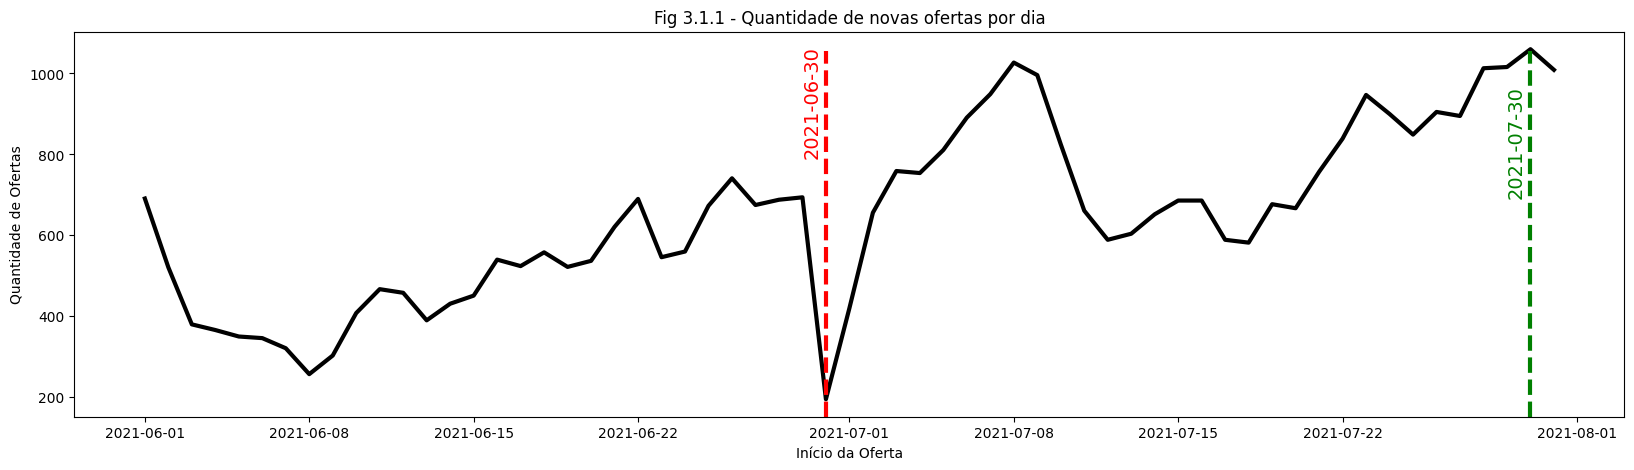

In [46]:
print('Data da primeira campanha iniciada: {}'.format(dt.datetime.strftime(dataframe['OFFER_START_DATE'].min(), '%Y-%m-%d')))
print('Data da última campanha iniciada: {}'.format(dt.datetime.strftime(dataframe['OFFER_START_DATE'].max(), '%Y-%m-%d')))

fig = plt.figure(figsize=(20, 5))

fig = sns.lineplot(
    x='OFFER_START_DATE',
    y='OFFER_TYPE',
    data=dataframe[['OFFER_START_DATE', 'OFFER_TYPE']].groupby(['OFFER_START_DATE']).count(),
    lw=3,
    color='black'
)

plt.xlabel(
    'Início da Oferta',
    fontsize=10
)
plt.ylabel(
    'Quantidade de Ofertas',
    fontsize=10
)
fig.set_title(
    'Fig 3.1.1 - Quantidade de novas ofertas por dia',
    fontsize=12
)

plt.axvline(
    x=dt.datetime.strptime('2021-06-30', '%Y-%m-%d'),
    color='red',
    ymax=0.95,
    lw=3,
    linestyle='--'
)
plt.annotate(
    '2021-06-30',
    xy=(dt.datetime.strptime('2021-06-29', '%Y-%m-%d'), 800),
    fontsize=14,
    rotation=90,
    color='red'
)

plt.axvline(
    x=dt.datetime.strptime('2021-07-30', '%Y-%m-%d'),
    color='green',
    ymax=0.95,
    lw=3,
    linestyle='--'
)
plt.annotate(
    '2021-07-30',
    xy=(dt.datetime.strptime('2021-07-29', '%Y-%m-%d'), 700),
    fontsize=14,
    rotation=90,
    color='green'
)

plt.show()

In [47]:
max_new_offers = dataframe[dataframe['OFFER_START_DATE']==dt.datetime.strptime('2021-07-30', '%Y-%m-%d')].shape[0]
min_new_offers = dataframe[dataframe['OFFER_START_DATE']==dt.datetime.strptime('2021-06-30', '%Y-%m-%d')].shape[0]

print('{} novas ofertas em 2021-07-30'.format(max_new_offers))
print('{} novas ofertas em 2021-06-30'.format(min_new_offers))

1060 novas ofertas em 2021-07-30
195 novas ofertas em 2021-06-30


<span style="color:purple">**INFO**</span>: o período de criação de ações de oferta vai de '2021-06-01' e '2021-07-31', com o máximo de criações em '2021-07-30' (1060) e o mínimo de novas ofertas em '2021-06-30' (195).

<span style="color:red">**QUESTÃO**</span>: é possível observar uma queda brusca no número de novas campanhas na data de '2021-06-30'. Essa queda pode ter sido gerada por algum erro de registro ou foi um movimento do mercado?

<span style="color:green">**INSIGHT**</span>: apesar do comportamento oscilatório, houve uma tendência de aumento do número de novas ofertas durante o período analisado.

<span style="color:red">**QUESTÃO**</span>: foi realizado algum trabalho informativo para clientes sobre a possibilidade da criação de ações de ofertas? Isso poderia justificar o aumento do número de ofertas dentro do período de análise.

----------------------------------------------------------

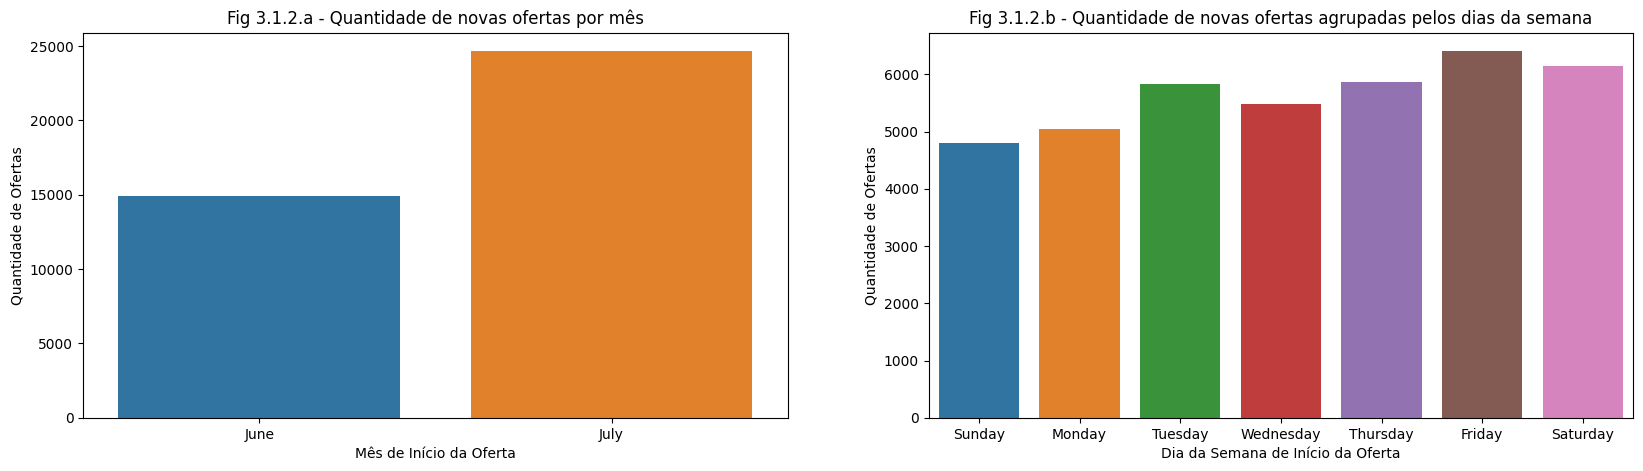

In [48]:
fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.countplot(
    x='OFFER_START_MONTH',
    data=dataframe,
    order=['June', 'July']
)

plt.xlabel(
    'Mês de Início da Oferta',
    fontsize=10
)
plt.ylabel(
    'Quantidade de Ofertas',
    fontsize=10
)
plt.title(
    'Fig 3.1.2.a - Quantidade de novas ofertas por mês',
    fontsize=12
)

plt.subplot(1, 2, 2)
sns.countplot(
    x='OFFER_START_WEEKDAY',
    data=dataframe,
    order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
)

plt.xlabel(
    'Dia da Semana de Início da Oferta',
    fontsize=10
)
plt.ylabel(
    'Quantidade de Ofertas',
    fontsize=10
)
plt.title(
    'Fig 3.1.2.b - Quantidade de novas ofertas agrupadas pelos dias da semana',
    fontsize=12
)

plt.show()

In [49]:
print('Porcentagem do número de ofertas criadas por mês: {}'.format(dataframe['OFFER_START_MONTH'].value_counts(normalize=True)))
print('\nPorcentagem do número de ofertas criadas por dia da semana: {}'.format(dataframe['OFFER_START_WEEKDAY'].value_counts(normalize=True)))

Porcentagem do número de ofertas criadas por mês: OFFER_START_MONTH
July    0.623399
June    0.376601
Name: proportion, dtype: float64

Porcentagem do número de ofertas criadas por dia da semana: OFFER_START_WEEKDAY
Friday       0.161946
Saturday     0.155477
Thursday     0.148073
Tuesday      0.147568
Wednesday    0.138370
Monday       0.127429
Sunday       0.121137
Name: proportion, dtype: float64


<span style="color:purple">**INFO**</span>: 62.3 % das ofertas foram criadas no mês de Julho, enquanto os outros 37.7 % foram criados no mês anterior. Esse aumento está de acordo com a observação realizada anteriormente (reforçando a questão anterior levantada).

<span style="color:green">**INSIGHT**</span>: a criação de novas campanhas mostra-se bem distribuída dentro dos dias da semana (com diferença máxima de 4.1 pontos percentuais), com uma pequena preferência de escolha para inícios de ofertas na Sexta (16.2 %) e no Sábado (15.5 %).

----------------------------------------------------------

Tempo da(s) campanha(s) com menor duração: 0.0
Tempo da(s) campanha(s) com maior duração: 16.0


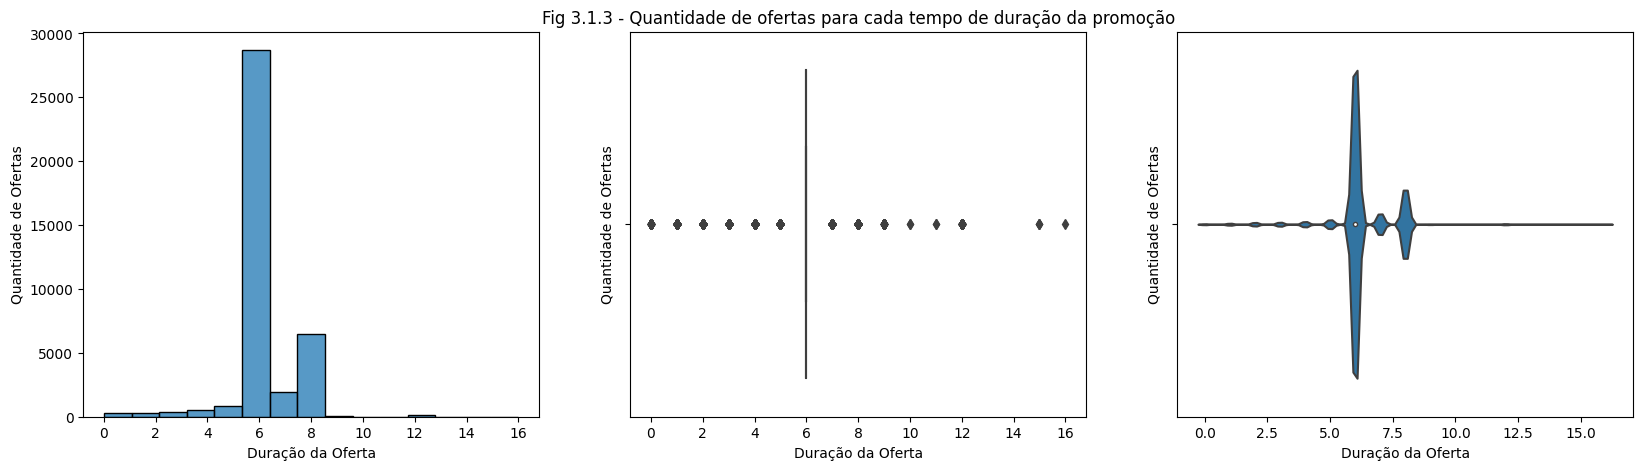

In [50]:
print('Tempo da(s) campanha(s) com menor duração: {}'.format(dataframe['OFFER_TIME_DELTA'].min()))
print('Tempo da(s) campanha(s) com maior duração: {}'.format(dataframe['OFFER_TIME_DELTA'].max()))

fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.histplot(
    data=dataframe,
    x='OFFER_TIME_DELTA',
    bins=15
)

plt.xlabel(
    'Duração da Oferta',
    fontsize=10
)
plt.ylabel(
    'Quantidade de Ofertas',
    fontsize=10
)

plt.subplot(1, 3, 2)
sns.boxplot(
    data=dataframe,
    x='OFFER_TIME_DELTA'
)

plt.xlabel(
    'Duração da Oferta',
    fontsize=10
)
plt.ylabel(
    'Quantidade de Ofertas',
    fontsize=10
)
plt.title(
    'Fig 3.1.3 - Quantidade de ofertas para cada tempo de duração da promoção',
    fontsize=12
)

plt.subplot(1, 3, 3)
sns.violinplot(
    data=dataframe,
    x='OFFER_TIME_DELTA'
)

plt.xlabel(
    'Duração da Oferta',
    fontsize=10
)
plt.ylabel(
    'Quantidade de Ofertas',
    fontsize=10
)

plt.show()

In [51]:
small_delta = 5
high_delta = 10

print('{:.2%} das ofertas duram até 5 horas'.format(dataframe[dataframe['OFFER_TIME_DELTA']<=small_delta].shape[0]/dataframe.shape[0]))
print('{:.2%} das ofertas duram entre 6 e 10 horas'.format(dataframe[(dataframe['OFFER_TIME_DELTA']>small_delta) & (dataframe['OFFER_TIME_DELTA']<=high_delta)].shape[0]/dataframe.shape[0]))
print('{:.2%} das ofertas durante mais de 10 horas'.format(dataframe[dataframe['OFFER_TIME_DELTA']>high_delta].shape[0]/dataframe.shape[0]))

5.74% das ofertas duram até 5 horas
93.98% das ofertas duram entre 6 e 10 horas
0.29% das ofertas durante mais de 10 horas


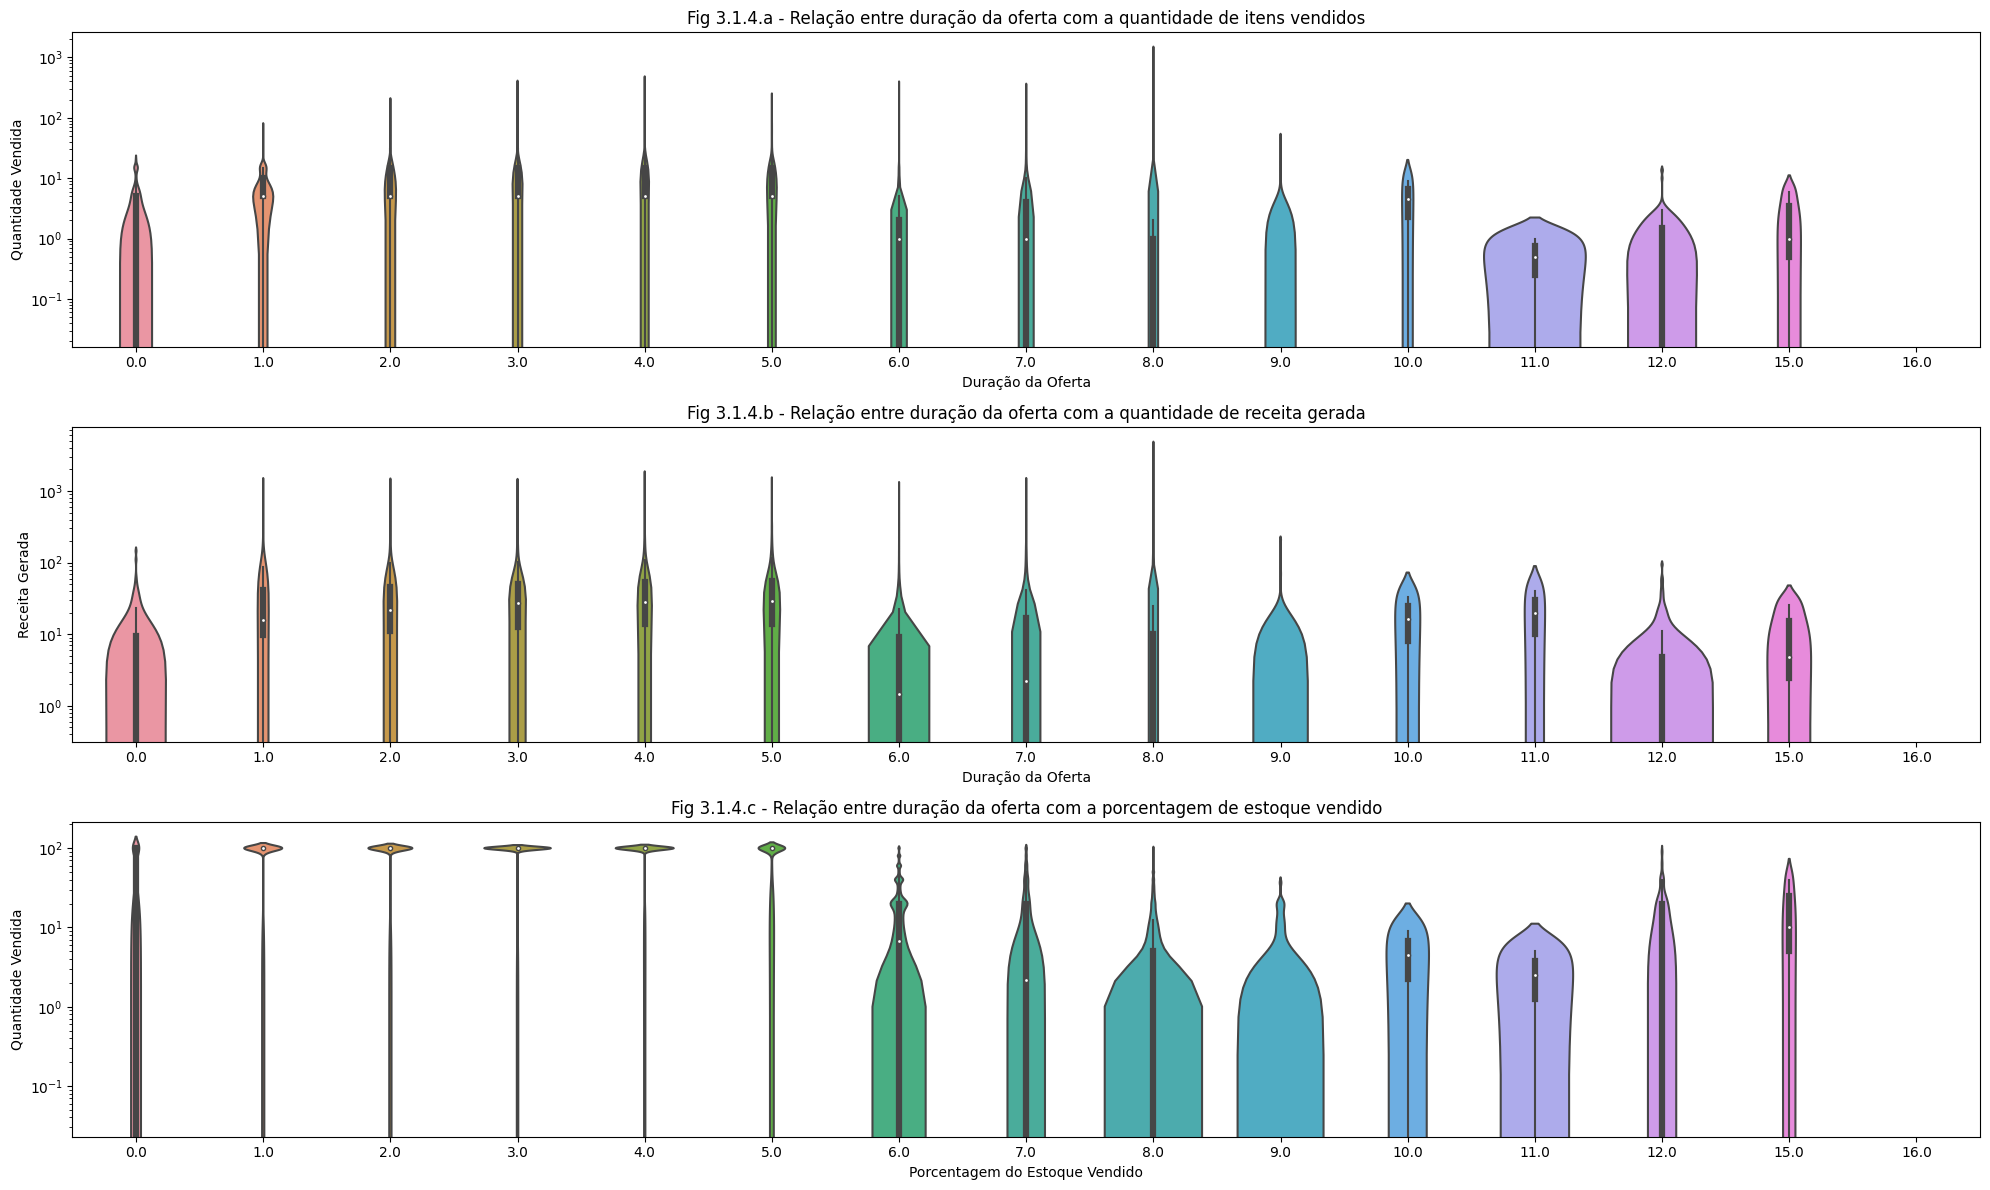

In [52]:
fig = plt.figure(figsize=(20,12))

plt.subplot(3, 1, 1)
sns.violinplot(
    data=dataframe,
    x='OFFER_TIME_DELTA',
    y='SOLD_QUANTITY'
)

plt.xlabel(
    'Duração da Oferta',
    fontsize=10
)
plt.yscale('log')
plt.ylabel(
    'Quantidade Vendida',
    fontsize=10
)
plt.title(
    'Fig 3.1.4.a - Relação entre duração da oferta com a quantidade de itens vendidos',
    fontsize=12
)

plt.subplot(3, 1, 2)
sns.violinplot(
    data=dataframe,
    x='OFFER_TIME_DELTA',
    y='SOLD_AMOUNT'
)

plt.xlabel(
    'Duração da Oferta',
    fontsize=10
)
plt.ylabel(
    'Receita Gerada',
    fontsize=10
)
plt.yscale('log')
plt.title(
    'Fig 3.1.4.b - Relação entre duração da oferta com a quantidade de receita gerada',
    fontsize=12
)

plt.subplot(3, 1, 3)
sns.violinplot(
    data=dataframe,
    x='OFFER_TIME_DELTA',
    y='SOLD_STOCK_PERC'
)

plt.xlabel(
    'Porcentagem do Estoque Vendido',
    fontsize=10
)
plt.yscale('log')
plt.ylabel(
    'Quantidade Vendida',
    fontsize=10
)
plt.title(
    'Fig 3.1.4.c - Relação entre duração da oferta com a porcentagem de estoque vendido',
    fontsize=12
)

plt.tight_layout()
plt.show()

In [53]:
delta_0_5 = dataframe[dataframe['OFFER_TIME_DELTA']<=small_delta].shape[0]

delta_0_5_empty_stock = dataframe[
    (dataframe['OFFER_TIME_DELTA']<=small_delta) &
    (dataframe['SOLD_STOCK_PERC']==100)
].shape[0]

print('{:.2%} das ofertas duram até 5 horas venderam todo seu estoque'.format(delta_0_5_empty_stock/delta_0_5))

86.17% das ofertas duram até 5 horas venderam todo seu estoque


In [54]:
delta_0_5_avg_amount = dataframe[dataframe['OFFER_TIME_DELTA']<=small_delta]['SOLD_AMOUNT'].mean()

delta_6_10_avg_amount = dataframe[
    (dataframe['OFFER_TIME_DELTA']>small_delta) &
    (dataframe['OFFER_TIME_DELTA']<=high_delta)
]['SOLD_AMOUNT'].mean()

print('As ofertas que duram até 5 horas geraram uma receita média de {:.2f}'.format(delta_0_5_avg_amount))
print('As ofertas que duram entre 6 e 10 horas geraram uma receita média de {:.2f}'.format(delta_6_10_avg_amount))

As ofertas que duram até 5 horas geraram uma receita média de 53.67
As ofertas que duram entre 6 e 10 horas geraram uma receita média de 14.35


In [55]:
delta_6_10_sum_amount = dataframe[
    (dataframe['OFFER_TIME_DELTA']>small_delta) &
    (dataframe['OFFER_TIME_DELTA']<=high_delta)
]['SOLD_AMOUNT'].sum()

total_sum_amount = dataframe['SOLD_AMOUNT'].sum()

print('A receita gerada pelas ofertas que duram entre 6 e 10 horas representam {:.2%} da receita total da base analisada'.format(delta_6_10_sum_amount/total_sum_amount))

A receita gerada pelas ofertas que duram entre 6 e 10 horas representam 81.32% da receita total da base analisada


<span style="color:purple">**INFO**</span>: grande parte das ofertas (94.0 %) possuem duração entre 6 e 10 horas.

<span style="color:purple">**INFO**</span>: as ações que duraram até 5 horas (5.7 %) mostram-se bastante eficientes na venda do seu estoque, com 86.2 % de suas ofertas vendendo todos os itens disponibilizados. Contudo, apesar destas ofertas gerarem uma receita média maior, a receita total é mais impactada pelas ofertas com duração entre 6 e 10 horas (81.3 % da receita total da base analisada), pela maior representatividade dentro da base analisada.

<span style="color:purple">**INFO**</span>: ações com duração maior do que 10 horas possuem baixa representatividade na base (0.3 %), e não mostram valores expressivos de performance quanto os recortes anteriormente citados.

----------------------------------------------------------

## 3.2 Departamentos e Verticais das Ofertas

In [56]:
freq_top10_DOM_DOMAIN_AGG1 = dataframe[['DOM_DOMAIN_AGG1', 'OFFER_TYPE']].groupby(['DOM_DOMAIN_AGG1']).count().reset_index(drop=False).sort_values(['OFFER_TYPE'], ascending=False).head(10)['OFFER_TYPE'].sum()
freq_top3_DOM_DOMAIN_AGG1 = dataframe[['DOM_DOMAIN_AGG1', 'OFFER_TYPE']].groupby(['DOM_DOMAIN_AGG1']).count().reset_index(drop=False).sort_values(['OFFER_TYPE'], ascending=False).head(3)['OFFER_TYPE'].sum()

print('Representatividade dos 10 DOM_DOMAIN_AGG1 mais frequentes: {:.2%}'.format(freq_top10_DOM_DOMAIN_AGG1/dataframe.shape[0]))
print('Representatividade dos 3 DOM_DOMAIN_AGG1 mais frequentes: {:.2%}'.format(freq_top3_DOM_DOMAIN_AGG1/dataframe.shape[0]))

Representatividade dos 10 DOM_DOMAIN_AGG1 mais frequentes: 70.61%
Representatividade dos 3 DOM_DOMAIN_AGG1 mais frequentes: 32.43%


In [57]:
sold_top10_DOM_DOMAIN_AGG1 = dataframe[['DOM_DOMAIN_AGG1', 'SOLD_QUANTITY']].groupby(['DOM_DOMAIN_AGG1']).sum().reset_index(drop=False).sort_values(['SOLD_QUANTITY'], ascending=False).head(10)['SOLD_QUANTITY'].sum()
sold_top3_DOM_DOMAIN_AGG1 = dataframe[['DOM_DOMAIN_AGG1', 'SOLD_QUANTITY']].groupby(['DOM_DOMAIN_AGG1']).sum().reset_index(drop=False).sort_values(['SOLD_QUANTITY'], ascending=False).head(3)['SOLD_QUANTITY'].sum()

print('Representatividade dos 10 DOM_DOMAIN_AGG1 com mais itens vendidos: {:.2%}'.format(sold_top10_DOM_DOMAIN_AGG1/dataframe['SOLD_QUANTITY'].sum()))
print('Representatividade dos 3 DOM_DOMAIN_AGG1 com mais itens vendidos: {:.2%}'.format(sold_top3_DOM_DOMAIN_AGG1/dataframe['SOLD_QUANTITY'].sum()))

Representatividade dos 10 DOM_DOMAIN_AGG1 com mais itens vendidos: 82.33%
Representatividade dos 3 DOM_DOMAIN_AGG1 com mais itens vendidos: 48.26%


In [58]:
amount_top10_DOM_DOMAIN_AGG1 = dataframe[['DOM_DOMAIN_AGG1', 'SOLD_AMOUNT']].groupby(['DOM_DOMAIN_AGG1']).sum().reset_index(drop=False).sort_values(['SOLD_AMOUNT'], ascending=False).head(10)['SOLD_AMOUNT'].sum()
amount_top3_DOM_DOMAIN_AGG1 = dataframe[['DOM_DOMAIN_AGG1', 'SOLD_AMOUNT']].groupby(['DOM_DOMAIN_AGG1']).sum().reset_index(drop=False).sort_values(['SOLD_AMOUNT'], ascending=False).head(3)['SOLD_AMOUNT'].sum()

print('Representatividade dos 10 DOM_DOMAIN_AGG1 com maior receita gerada: {:.2%}'.format(amount_top10_DOM_DOMAIN_AGG1/dataframe['SOLD_AMOUNT'].sum()))
print('Representatividade dos 3 DOM_DOMAIN_AGG1 com maior receita gerada: {:.2%}'.format(amount_top3_DOM_DOMAIN_AGG1/dataframe['SOLD_AMOUNT'].sum()))

Representatividade dos 10 DOM_DOMAIN_AGG1 com maior receita gerada: 82.65%
Representatividade dos 3 DOM_DOMAIN_AGG1 com maior receita gerada: 41.15%


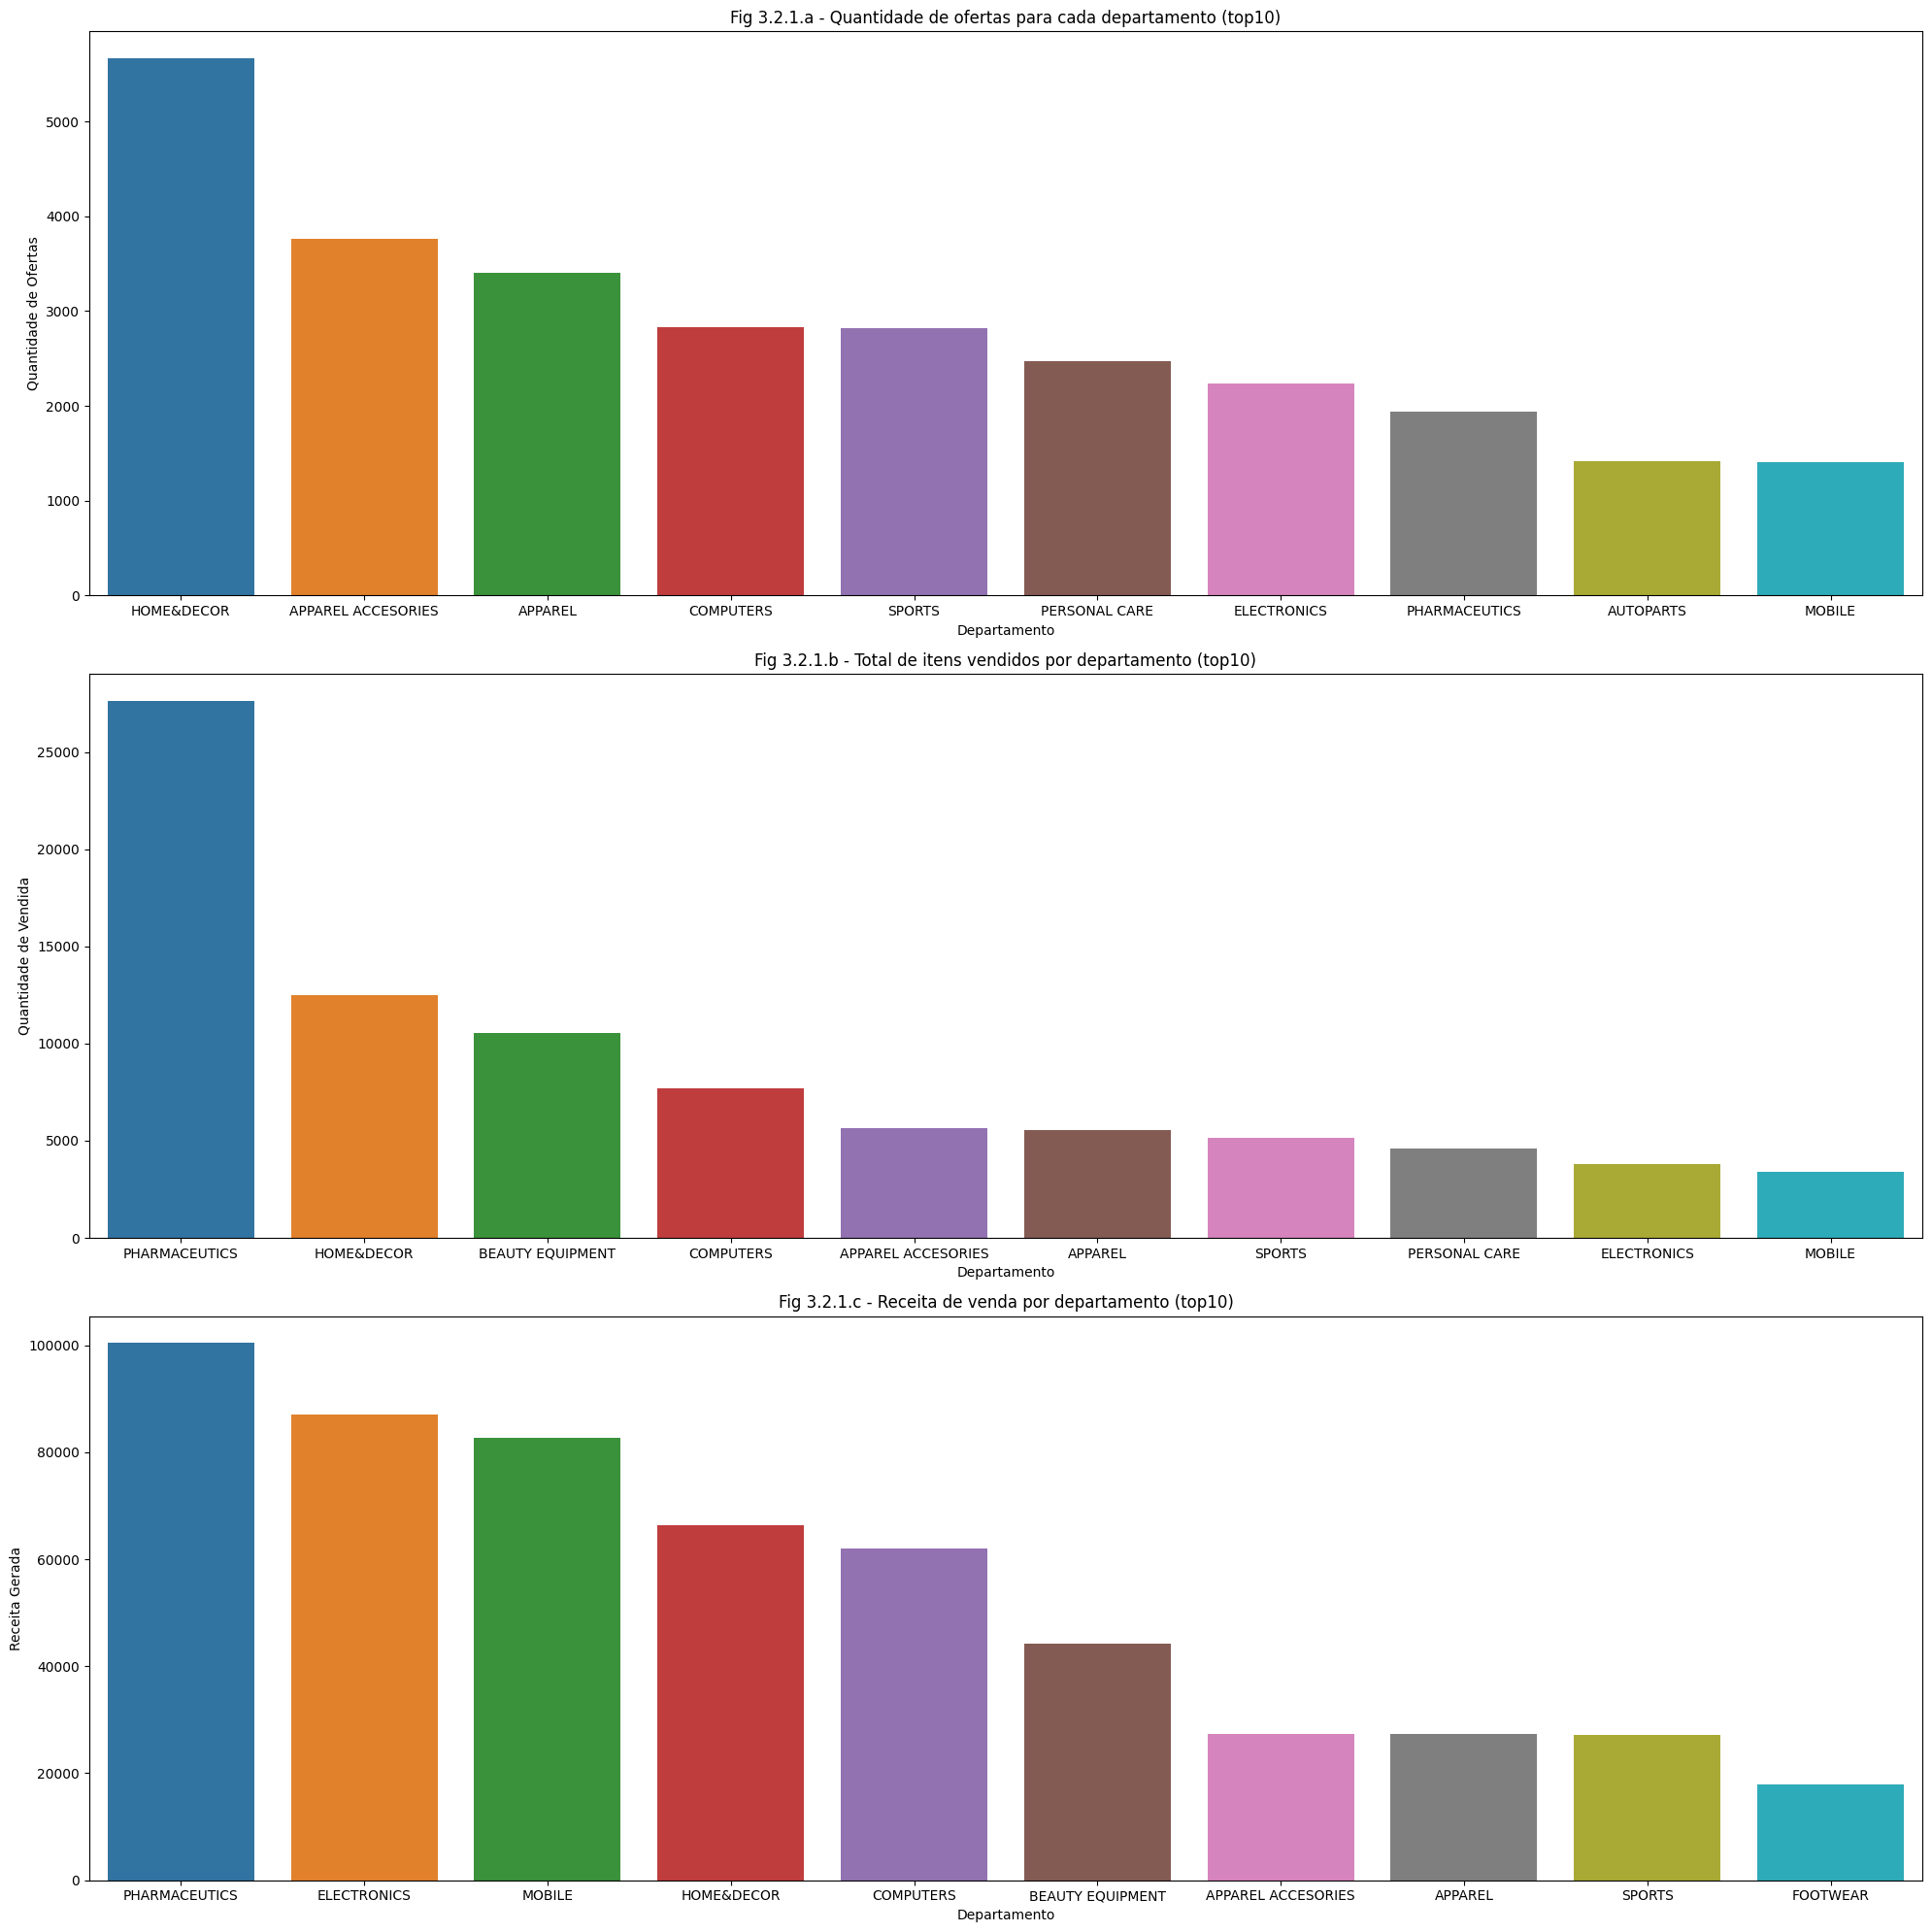

In [59]:
fig = plt.figure(figsize=(20, 20))

plt.subplot(3, 1, 1)
sns.barplot(
    data=dataframe[['DOM_DOMAIN_AGG1', 'OFFER_TYPE']].groupby(['DOM_DOMAIN_AGG1']).count().reset_index(drop=False).sort_values(['OFFER_TYPE'], ascending=False).head(10),
    x='DOM_DOMAIN_AGG1',
    y='OFFER_TYPE'
)

plt.xlabel(
    'Departamento',
    fontsize=10
)
plt.ylabel(
    'Quantidade de Ofertas',
    fontsize=10
)
plt.title(
    'Fig 3.2.1.a - Quantidade de ofertas para cada departamento (top10)',
    fontsize=12
)

plt.subplot(3, 1, 2)
sns.barplot(
    data=dataframe[['DOM_DOMAIN_AGG1', 'SOLD_QUANTITY']].groupby(['DOM_DOMAIN_AGG1']).sum().reset_index(drop=False).sort_values(['SOLD_QUANTITY'], ascending=False).head(10),
    x='DOM_DOMAIN_AGG1',
    y='SOLD_QUANTITY'
)

plt.xlabel(
    'Departamento',
    fontsize=10
)
plt.ylabel(
    'Quantidade de Vendida',
    fontsize=10
)
plt.title(
    'Fig 3.2.1.b - Total de itens vendidos por departamento (top10)',
    fontsize=12
)

plt.subplot(3, 1, 3)
sns.barplot(
    data=dataframe[['DOM_DOMAIN_AGG1', 'SOLD_AMOUNT']].groupby(['DOM_DOMAIN_AGG1']).sum().reset_index(drop=False).sort_values(['SOLD_AMOUNT'], ascending=False).head(10),
    x='DOM_DOMAIN_AGG1',
    y='SOLD_AMOUNT'
)

plt.xlabel(
    'Departamento',
    fontsize=10
)
plt.ylabel(
    'Receita Gerada',
    fontsize=10
)
plt.title(
    'Fig 3.2.1.c - Receita de venda por departamento (top10)',
    fontsize=12
)

plt.tight_layout()
plt.show()

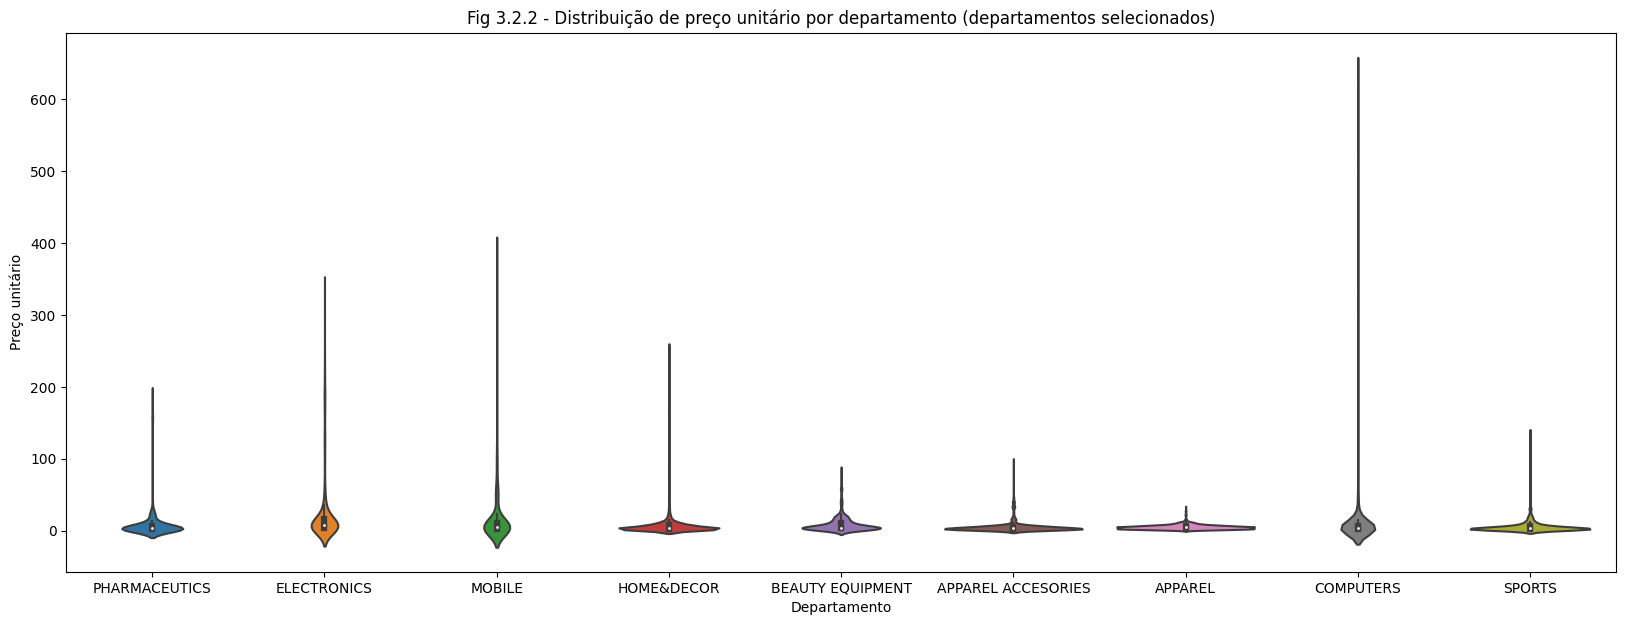

In [60]:
list_DOM_DOMAIN_AGG1 = ['PHARMACEUTICS', 'ELECTRONICS', 'MOBILE', 'HOME&DECOR', 'BEAUTY EQUIPMENT', 'APPAREL ACCESORIES', 'APPAREL', 'COMPUTERS', 'SPORTS']

fig = plt.figure(figsize=(20, 7))

sns.violinplot(
    data=dataframe[
        (dataframe['DOM_DOMAIN_AGG1'].isin(list_DOM_DOMAIN_AGG1)) &
        (dataframe['UNIT_PRICE']!=-999)
    ],
    x='DOM_DOMAIN_AGG1',
    y='UNIT_PRICE',
    order=list_DOM_DOMAIN_AGG1
)

plt.xlabel(
    'Departamento',
    fontsize=10
)
plt.ylabel(
    'Preço unitário',
    fontsize=10
)
plt.title(
    'Fig 3.2.2 - Distribuição de preço unitário por departamento (departamentos selecionados)',
    fontsize=12
)

plt.show()

In [61]:
for dep in list_DOM_DOMAIN_AGG1:
    df_ = dataframe[
        (dataframe['DOM_DOMAIN_AGG1']==dep) &
        (dataframe['UNIT_PRICE']!=-999)
    ]
    print('{}: menor preço: {} | maior preço: {} | range: {}\n'.format(dep, df_['UNIT_PRICE'].min(), df_['UNIT_PRICE'].max(), (df_['UNIT_PRICE'].max()-df_['UNIT_PRICE'].min())))

PHARMACEUTICS: menor preço: 0.46 | maior preço: 189.21 | range: 188.75

ELECTRONICS: menor preço: 0.65 | maior preço: 331.34 | range: 330.69

MOBILE: menor preço: 0.61 | maior preço: 385.04 | range: 384.43

HOME&DECOR: menor preço: 0.56 | maior preço: 255.72 | range: 255.16

BEAUTY EQUIPMENT: menor preço: 0.62 | maior preço: 83.06 | range: 82.44

APPAREL ACCESORIES: menor preço: 0.66 | maior preço: 97.06 | range: 96.4

APPAREL: menor preço: 0.58 | maior preço: 32.91 | range: 32.33

COMPUTERS: menor preço: 0.57 | maior preço: 639.07 | range: 638.5

SPORTS: menor preço: 0.61 | maior preço: 136.78 | range: 136.17



<span style="color:purple">**INFO**</span>: o top 10 departamentos mais frequentes representa 70.6 % da base de ofertas analisada. O top 3, que representa 32.4 %, é formado por 'HOME&DECOR', 'APPAREL ACCESORIES' e 'APPAREL'.

<span style="color:purple">**INFO**</span>: o top 10 departamento com maior quantidade de itens vendidos representa 82.3 % da base analisada. O top 3, que representa 48.3 % do total de itens vendidos, é composto por 'PHARMACEUTICS' (que ocupa a oitava posição de departamento mais frequente), 'HOME&DECOR' e 'BEAUTY EQUIPMENT' (não aparece no top 10 departamentos mais frequentes).

<span style="color:purple">**INFO**</span>: o top 10 departamento com maior receita gerada representa 82.6 % da receita gerada pela base analisada. O top 3, que representa 41.1 % do total de receita, é composto por 'PHARMACEUTICS', 'ELECTRONICS' (que aparece como o sétimo departamento mais frequente) e 'MOBILE' (que é o décimo departamento mais recente).

<span style="color:purple">**INFO**</span>: dentre os departamento selecionados, o departamento 'COMPUTERS' é o que apresenta o maior range de preços unitários das ofertas (638.50). Esse departamento ocupa o top 4 de maior frequência de ofertas e quantidade de itens vendidos, além de ocupar o quinto lugar quando olhamos para a receita geral.

<span style="color:purple">**INFO**</span>: dentre os departamento selecionados, o departamento 'APPAREL' é o que apresenta o menor range de preços unitários das ofertas (32.33), com grande concentração em preços unitários baixos. Esse departamento ocupa o top 3 de maior frequência de ofertas, top 6 de quantidade de itens vendidos e top 8 quando olhamos para a receita geral. Nota-se que mesmo com a grande quantidade de ofertas disponíveis, a baixa performance de vendas, junto dos baixos valores unitários das ofertas, impacta na receita gerada da ação.

<span style="color:purple">**INFO**</span>: o departamento 'PHARMACEUTICS' apresenta um range intermediário de preços unitários das ofertas (188.75), dentro dos departamento selecionados para análise. Esse departamento, que ocupa apenas a oitava posição de maior frequência de ofertas, configura como top 1 em quantidade de itens vendidos e receita gerada.

<span style="color:green">**INSIGHT**</span>: nota-se que apesar da maior frequência de ofertas nos departamento 'HOME&DECOR', 'APPAREL ACCESORIES' e 'APPAREL', o consumo das ofertas sofreu um impacto do cenário da época (pandemia do coronavírus), o que resultou no departamento 'PHARMACEUTICS' como top 1 na quantidade de itens vendidos e na receita gerada.

<span style="color:green">**INSIGHT**</span>: nota-se que houve o consumo de ofertas de 'ELECTRONICS', 'MOBILE' e 'COMPUTERS', departamentos geralmente associados à altos valores de custo unitário. Isso indica que mesmo durante o cenário da época, usuários ainda foram impactados com 'oportunidades' de consumo de itens mais caros.

----------------------------------------------------------

In [62]:
freq_top3_VERTICAL = dataframe[['VERTICAL', 'OFFER_TYPE']].groupby(['VERTICAL']).count().reset_index(drop=False).sort_values(['OFFER_TYPE'], ascending=False).head(3)['OFFER_TYPE'].sum()

print('Representatividade dos 3 VERTICAL mais frequentes: {:.2%}'.format(freq_top3_VERTICAL/dataframe.shape[0]))

Representatividade dos 3 VERTICAL mais frequentes: 68.54%


In [63]:
sold_top3_VERTICAL = dataframe[['VERTICAL', 'SOLD_QUANTITY']].groupby(['VERTICAL']).sum().reset_index(drop=False).sort_values(['SOLD_QUANTITY'], ascending=False).head(3)['SOLD_QUANTITY'].sum()

print('Representatividade dos 3 VERTICAL com mais itens vendidos: {:.2%}'.format(sold_top3_VERTICAL/dataframe['SOLD_QUANTITY'].sum()))

Representatividade dos 3 VERTICAL com mais itens vendidos: 76.18%


In [64]:
amount_top3_VERTICAL = dataframe[['VERTICAL', 'SOLD_AMOUNT']].groupby(['VERTICAL']).sum().reset_index(drop=False).sort_values(['SOLD_AMOUNT'], ascending=False).head(3)['SOLD_AMOUNT'].sum()

print('Representatividade dos 3 VERTICAL com maior receita gerada: {:.2%}'.format(amount_top3_VERTICAL/dataframe['SOLD_AMOUNT'].sum()))

Representatividade dos 3 VERTICAL com maior receita gerada: 76.67%


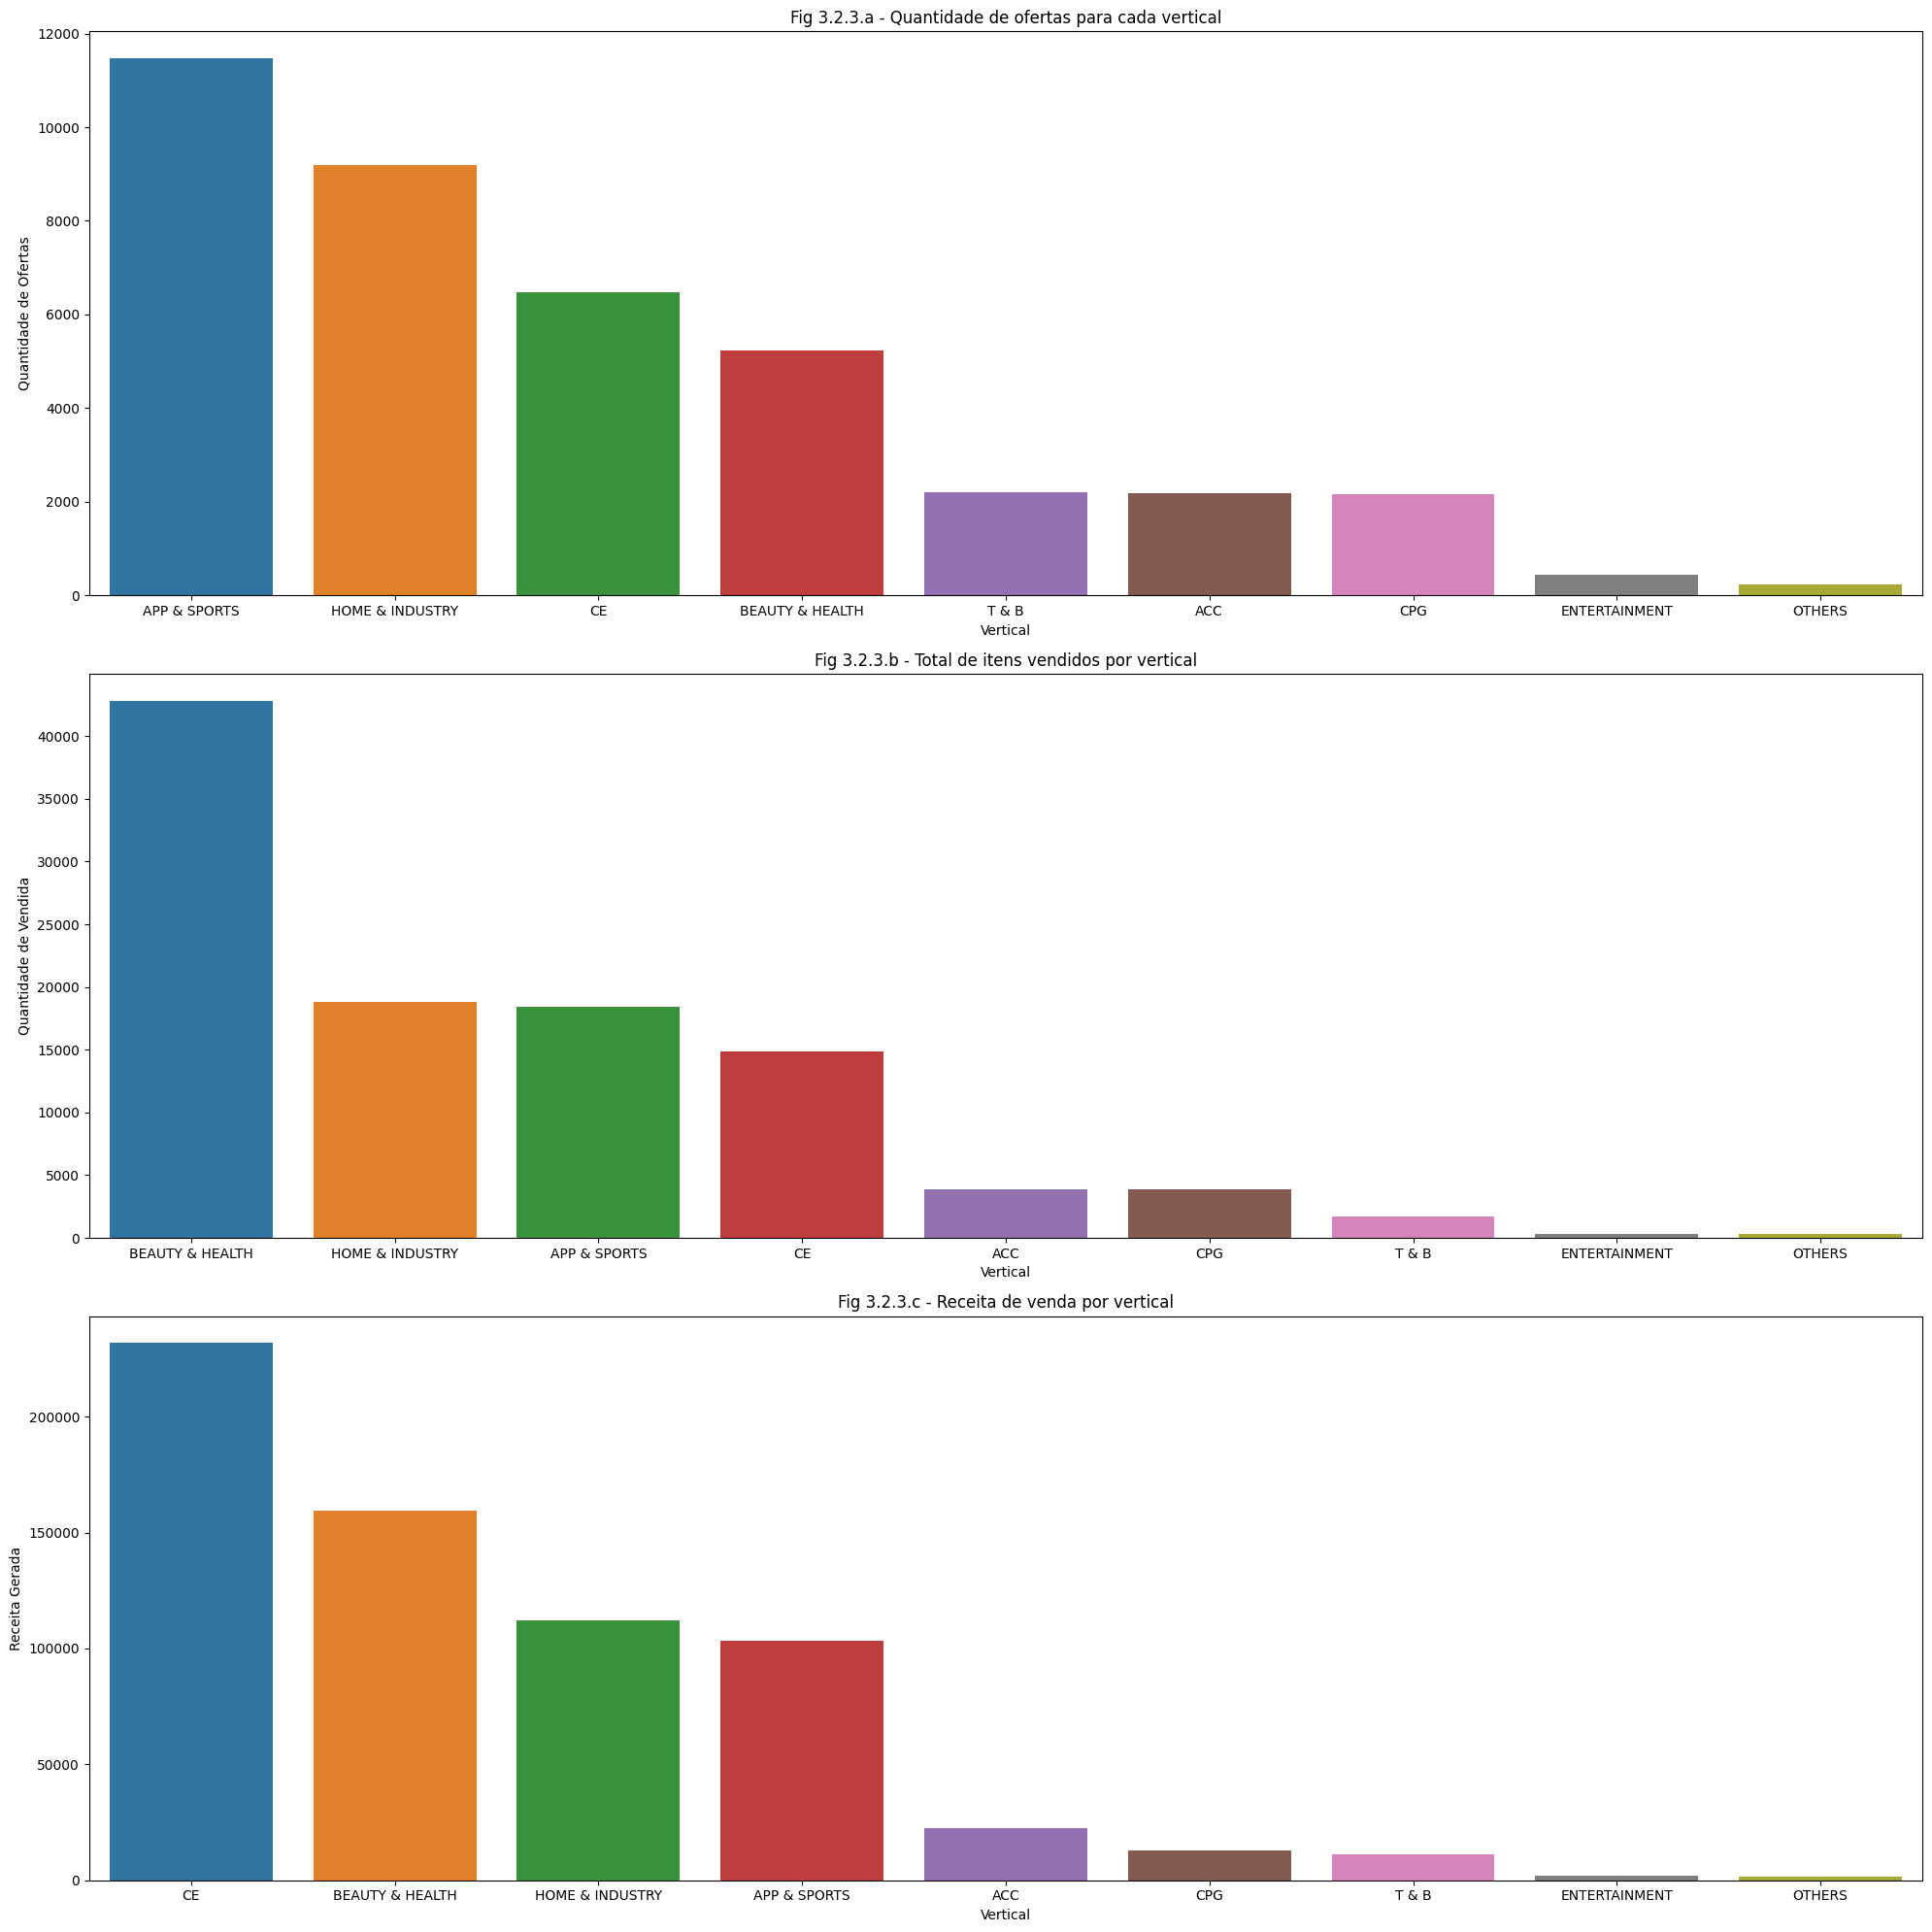

In [65]:
fig = plt.figure(figsize=(20, 20))

plt.subplot(3, 1, 1)
sns.barplot(
    data=dataframe[['VERTICAL', 'OFFER_TYPE']].groupby(['VERTICAL']).count().reset_index(drop=False).sort_values(['OFFER_TYPE'], ascending=False).head(10),
    x='VERTICAL',
    y='OFFER_TYPE'
)

plt.xlabel(
    'Vertical',
    fontsize=10
)
plt.ylabel(
    'Quantidade de Ofertas',
    fontsize=10
)
plt.title(
    'Fig 3.2.3.a - Quantidade de ofertas para cada vertical',
    fontsize=12
)

plt.subplot(3, 1, 2)
sns.barplot(
    data=dataframe[['VERTICAL', 'SOLD_QUANTITY']].groupby(['VERTICAL']).sum().reset_index(drop=False).sort_values(['SOLD_QUANTITY'], ascending=False).head(10),
    x='VERTICAL',
    y='SOLD_QUANTITY'
)

plt.xlabel(
    'Vertical',
    fontsize=10
)
plt.ylabel(
    'Quantidade de Vendida',
    fontsize=10
)
plt.title(
    'Fig 3.2.3.b - Total de itens vendidos por vertical',
    fontsize=12
)

plt.subplot(3, 1, 3)
sns.barplot(
    data=dataframe[['VERTICAL', 'SOLD_AMOUNT']].groupby(['VERTICAL']).sum().reset_index(drop=False).sort_values(['SOLD_AMOUNT'], ascending=False).head(10),
    x='VERTICAL',
    y='SOLD_AMOUNT'
)

plt.xlabel(
    'Vertical',
    fontsize=10
)
plt.ylabel(
    'Receita Gerada',
    fontsize=10
)
plt.title(
    'Fig 3.2.3.c - Receita de venda por vertical',
    fontsize=12
)

plt.tight_layout()
plt.show()

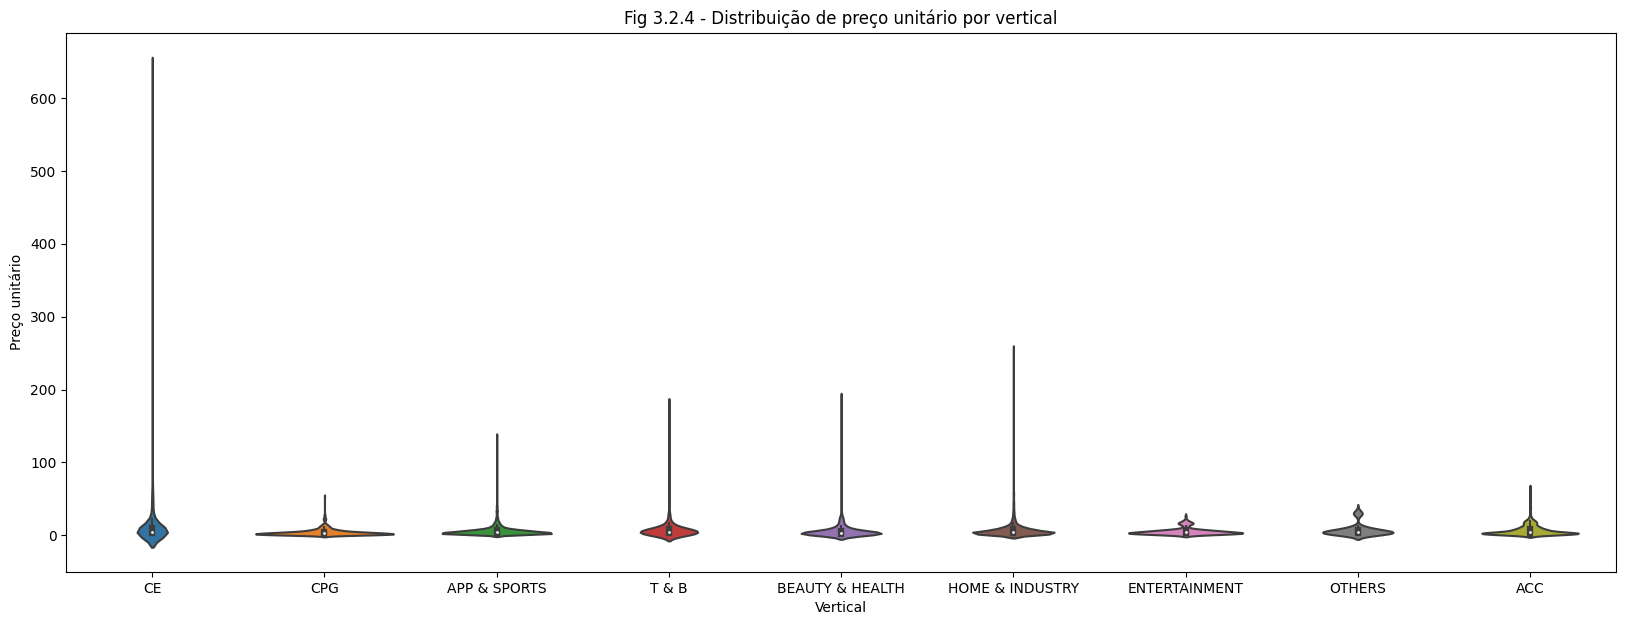

In [66]:
fig = plt.figure(figsize=(20, 7))

sns.violinplot(
    data=dataframe[dataframe['UNIT_PRICE']!=-999],
    x='VERTICAL',
    y='UNIT_PRICE'
)

plt.xlabel(
    'Vertical',
    fontsize=10
)
plt.ylabel(
    'Preço unitário',
    fontsize=10
)
plt.title(
    'Fig 3.2.4 - Distribuição de preço unitário por vertical',
    fontsize=12
)

plt.show()

In [67]:
for vert in dataframe['VERTICAL'].unique():
    df_ = dataframe[
        (dataframe['VERTICAL']==vert) &
        (dataframe['UNIT_PRICE']!=-999)
    ]
    print('{}: menor preço: {} | maior preço: {} | range: {}\n'.format(vert, df_['UNIT_PRICE'].min(), df_['UNIT_PRICE'].max(), (df_['UNIT_PRICE'].max()-df_['UNIT_PRICE'].min())))

OTHERS: menor preço: 0.84 | maior preço: 35.83 | range: 34.989999999999995

CE: menor preço: 0.57 | maior preço: 639.07 | range: 638.5

CPG: menor preço: 0.12 | maior preço: 53.18 | range: 53.06

APP & SPORTS: menor preço: 0.58 | maior preço: 136.78 | range: 136.2

T & B: menor preço: 0.57 | maior preço: 179.39 | range: 178.82

BEAUTY & HEALTH: menor preço: 0.28 | maior preço: 189.21 | range: 188.93

HOME & INDUSTRY: menor preço: 0.53 | maior preço: 255.72 | range: 255.19

ENTERTAINMENT: menor preço: 1.41 | maior preço: 26.19 | range: 24.78

ACC: menor preço: 0.64 | maior preço: 65.25 | range: 64.61



In [68]:
for vert in dataframe['VERTICAL'].unique():
    df_ = dataframe[dataframe['VERTICAL']==vert]

    print('{}: {}\n'.format(vert, df_['DOM_DOMAIN_AGG1'].unique()))

OTHERS: ['PET PRODUCTS' 'OTHER' 'ANTIQUES & HOBBIES']

CE: ['COMPUTERS' 'ELECTRONICS' 'MOBILE']

CPG: ['PETS FOOD' 'DRINKS' 'FOODS' 'PERSONAL HYGIENE' 'CLEANING' 'BATTERIES']

APP & SPORTS: ['APPAREL' 'SPORTS' 'FOOTWEAR' 'APPAREL ACCESORIES' 'SUPLEMENTS']

T & B: ['TOYS AND GAMES' 'PARTY' 'BABY']

BEAUTY & HEALTH: ['PERSONAL CARE' 'BEAUTY EQUIPMENT' 'PHARMACEUTICS']

HOME & INDUSTRY: ['INDUSTRY' 'TOOLS AND CONSTRUCTION' 'HOME&DECOR' 'STATIONARY' 'SECURITY']

ENTERTAINMENT: ['BOOKS, MULTIMEDIA & OTHER E!' 'MUSICAL INSTRUMENTS']

ACC: ['AUTOPARTS' 'WHEELS & TIRES' 'VEHICULAR MULTIMEDIA' 'MOTOPARTS'
 'ACC TOOLS' 'AGRO']



<span style="color:purple">**INFO**</span>: o top 3 verticais mais frequentes representa 68.5 % da base de ofertas analisada, e é formado por 'APP & SPORTS', 'HOME & INDUSTRY' e 'CE'.

<span style="color:purple">**INFO**</span>: o top 3 verticais com maior quantidade de itens vendidos representa 76.2 % da base analisada e é composto por 'BEAUTY & HEALTH' (que ocupa a quarta posição de vertical mais frequente), 'HOME & INDUSTRY' e 'APP & SPORTS'.

<span style="color:purple">**INFO**</span>: o top 3 verticais com maior receita gerada, que representa 76.7 % da receita gerada pela base analisada, é composto por 'CE', 'BEAUTY & HEALTH' e 'HOME & INDUSTRY' (que é o décimo departamento mais recente).

<span style="color:purple">**INFO**</span>: a vertical 'CE' (composta pelos departamentos 'COMPUTERS', 'ELECTRONICS' e 'MOBILE'), que aparece com o maior share de receita gerada, configura como terceira vertical mais frequente e quarta vertical com maior número de vendas. Possuindo o maior range de preços unitários das ofertas (638.50). Aqui nota-se que mesmo não configurando no top 3 de verticais mais vendidas, os altos valores unitários das ofertas colaboraram para uma boa performance de receita gerada.

<span style="color:purple">**INFO**</span>: a vertical 'ENTERTAINMENT' (composta pelos departamento 'BOOKS, MULTIMEDIA & OTHER E!' e 'MUSICAL INSTRUMENTS') é a que apresenta o menor range de preços unitários das ofertas (24.78). Essa vertical ocupa a nona posição nos três parâmetros analisados (frequência, quantidade de itens vendidos e receita gerada), ficando a frente apenas da vertical 'OTHERS', que por sua vez possui um range de preços unitários levemente maior que a vertical anterior (34.99).

<span style="color:green">**INSIGHT**</span>: seguindo o insight levantando na análise dos departamentos, enquanto a vertical 'BEAUTY & HEALTH' aparece como líder na quantidade de itens vendidos, é a vertical 'CE' que detém o maior share de receita gerada, sendo está última vertical associada aos departamentos 'ELECTRONICS', 'MOBILE' e 'COMPUTERS'. Isso corrobora o ponto sobre consumo de itens mais caros no cenário da época.

----------------------------------------------------------

In [69]:
freq_top10_DOMAIN_ID = dataframe[['DOMAIN_ID', 'OFFER_TYPE']].groupby(['DOMAIN_ID']).count().reset_index(drop=False).sort_values(['OFFER_TYPE'], ascending=False).head(10)['OFFER_TYPE'].sum()
freq_top3_DOMAIN_ID = dataframe[['DOMAIN_ID', 'OFFER_TYPE']].groupby(['DOMAIN_ID']).count().reset_index(drop=False).sort_values(['OFFER_TYPE'], ascending=False).head(3)['OFFER_TYPE'].sum()

print('Representatividade dos 10 DOMAIN_ID mais frequentes: {:.2%}'.format(freq_top10_DOMAIN_ID/dataframe.shape[0]))
print('Representatividade dos 3 DOMAIN_ID mais frequentes: {:.2%}'.format(freq_top3_DOMAIN_ID/dataframe.shape[0]))

Representatividade dos 10 DOMAIN_ID mais frequentes: 11.10%
Representatividade dos 3 DOMAIN_ID mais frequentes: 4.75%


In [70]:
sold_top10_DOMAIN_ID = dataframe[['DOMAIN_ID', 'SOLD_QUANTITY']].groupby(['DOMAIN_ID']).sum().reset_index(drop=False).sort_values(['SOLD_QUANTITY'], ascending=False).head(10)['SOLD_QUANTITY'].sum()
sold_top3_DOMAIN_ID = dataframe[['DOMAIN_ID', 'SOLD_QUANTITY']].groupby(['DOMAIN_ID']).sum().reset_index(drop=False).sort_values(['SOLD_QUANTITY'], ascending=False).head(3)['SOLD_QUANTITY'].sum()

print('Representatividade dos 10 DOMAIN_ID com mais itens vendidos: {:.2%}'.format(sold_top10_DOMAIN_ID/dataframe['SOLD_QUANTITY'].sum()))
print('Representatividade dos 3 DOMAIN_ID com mais itens vendidos: {:.2%}'.format(sold_top3_DOMAIN_ID/dataframe['SOLD_QUANTITY'].sum()))

Representatividade dos 10 DOMAIN_ID com mais itens vendidos: 41.42%
Representatividade dos 3 DOMAIN_ID com mais itens vendidos: 32.68%


In [71]:
amount_top10_DOMAIN_ID = dataframe[['DOMAIN_ID', 'SOLD_AMOUNT']].groupby(['DOMAIN_ID']).sum().reset_index(drop=False).sort_values(['SOLD_AMOUNT'], ascending=False).head(10)['SOLD_AMOUNT'].sum()
amount_top3_DOMAIN_ID = dataframe[['DOMAIN_ID', 'SOLD_AMOUNT']].groupby(['DOMAIN_ID']).sum().reset_index(drop=False).sort_values(['SOLD_AMOUNT'], ascending=False).head(3)['SOLD_AMOUNT'].sum()

print('Representatividade dos 10 DOMAIN_ID com maior receita gerada: {:.2%}'.format(amount_top10_DOMAIN_ID/dataframe['SOLD_AMOUNT'].sum()))
print('Representatividade dos 3 DOMAIN_ID com maior receita gerada: {:.2%}'.format(amount_top3_DOMAIN_ID/dataframe['SOLD_AMOUNT'].sum()))

Representatividade dos 10 DOMAIN_ID com maior receita gerada: 43.51%
Representatividade dos 3 DOMAIN_ID com maior receita gerada: 28.80%


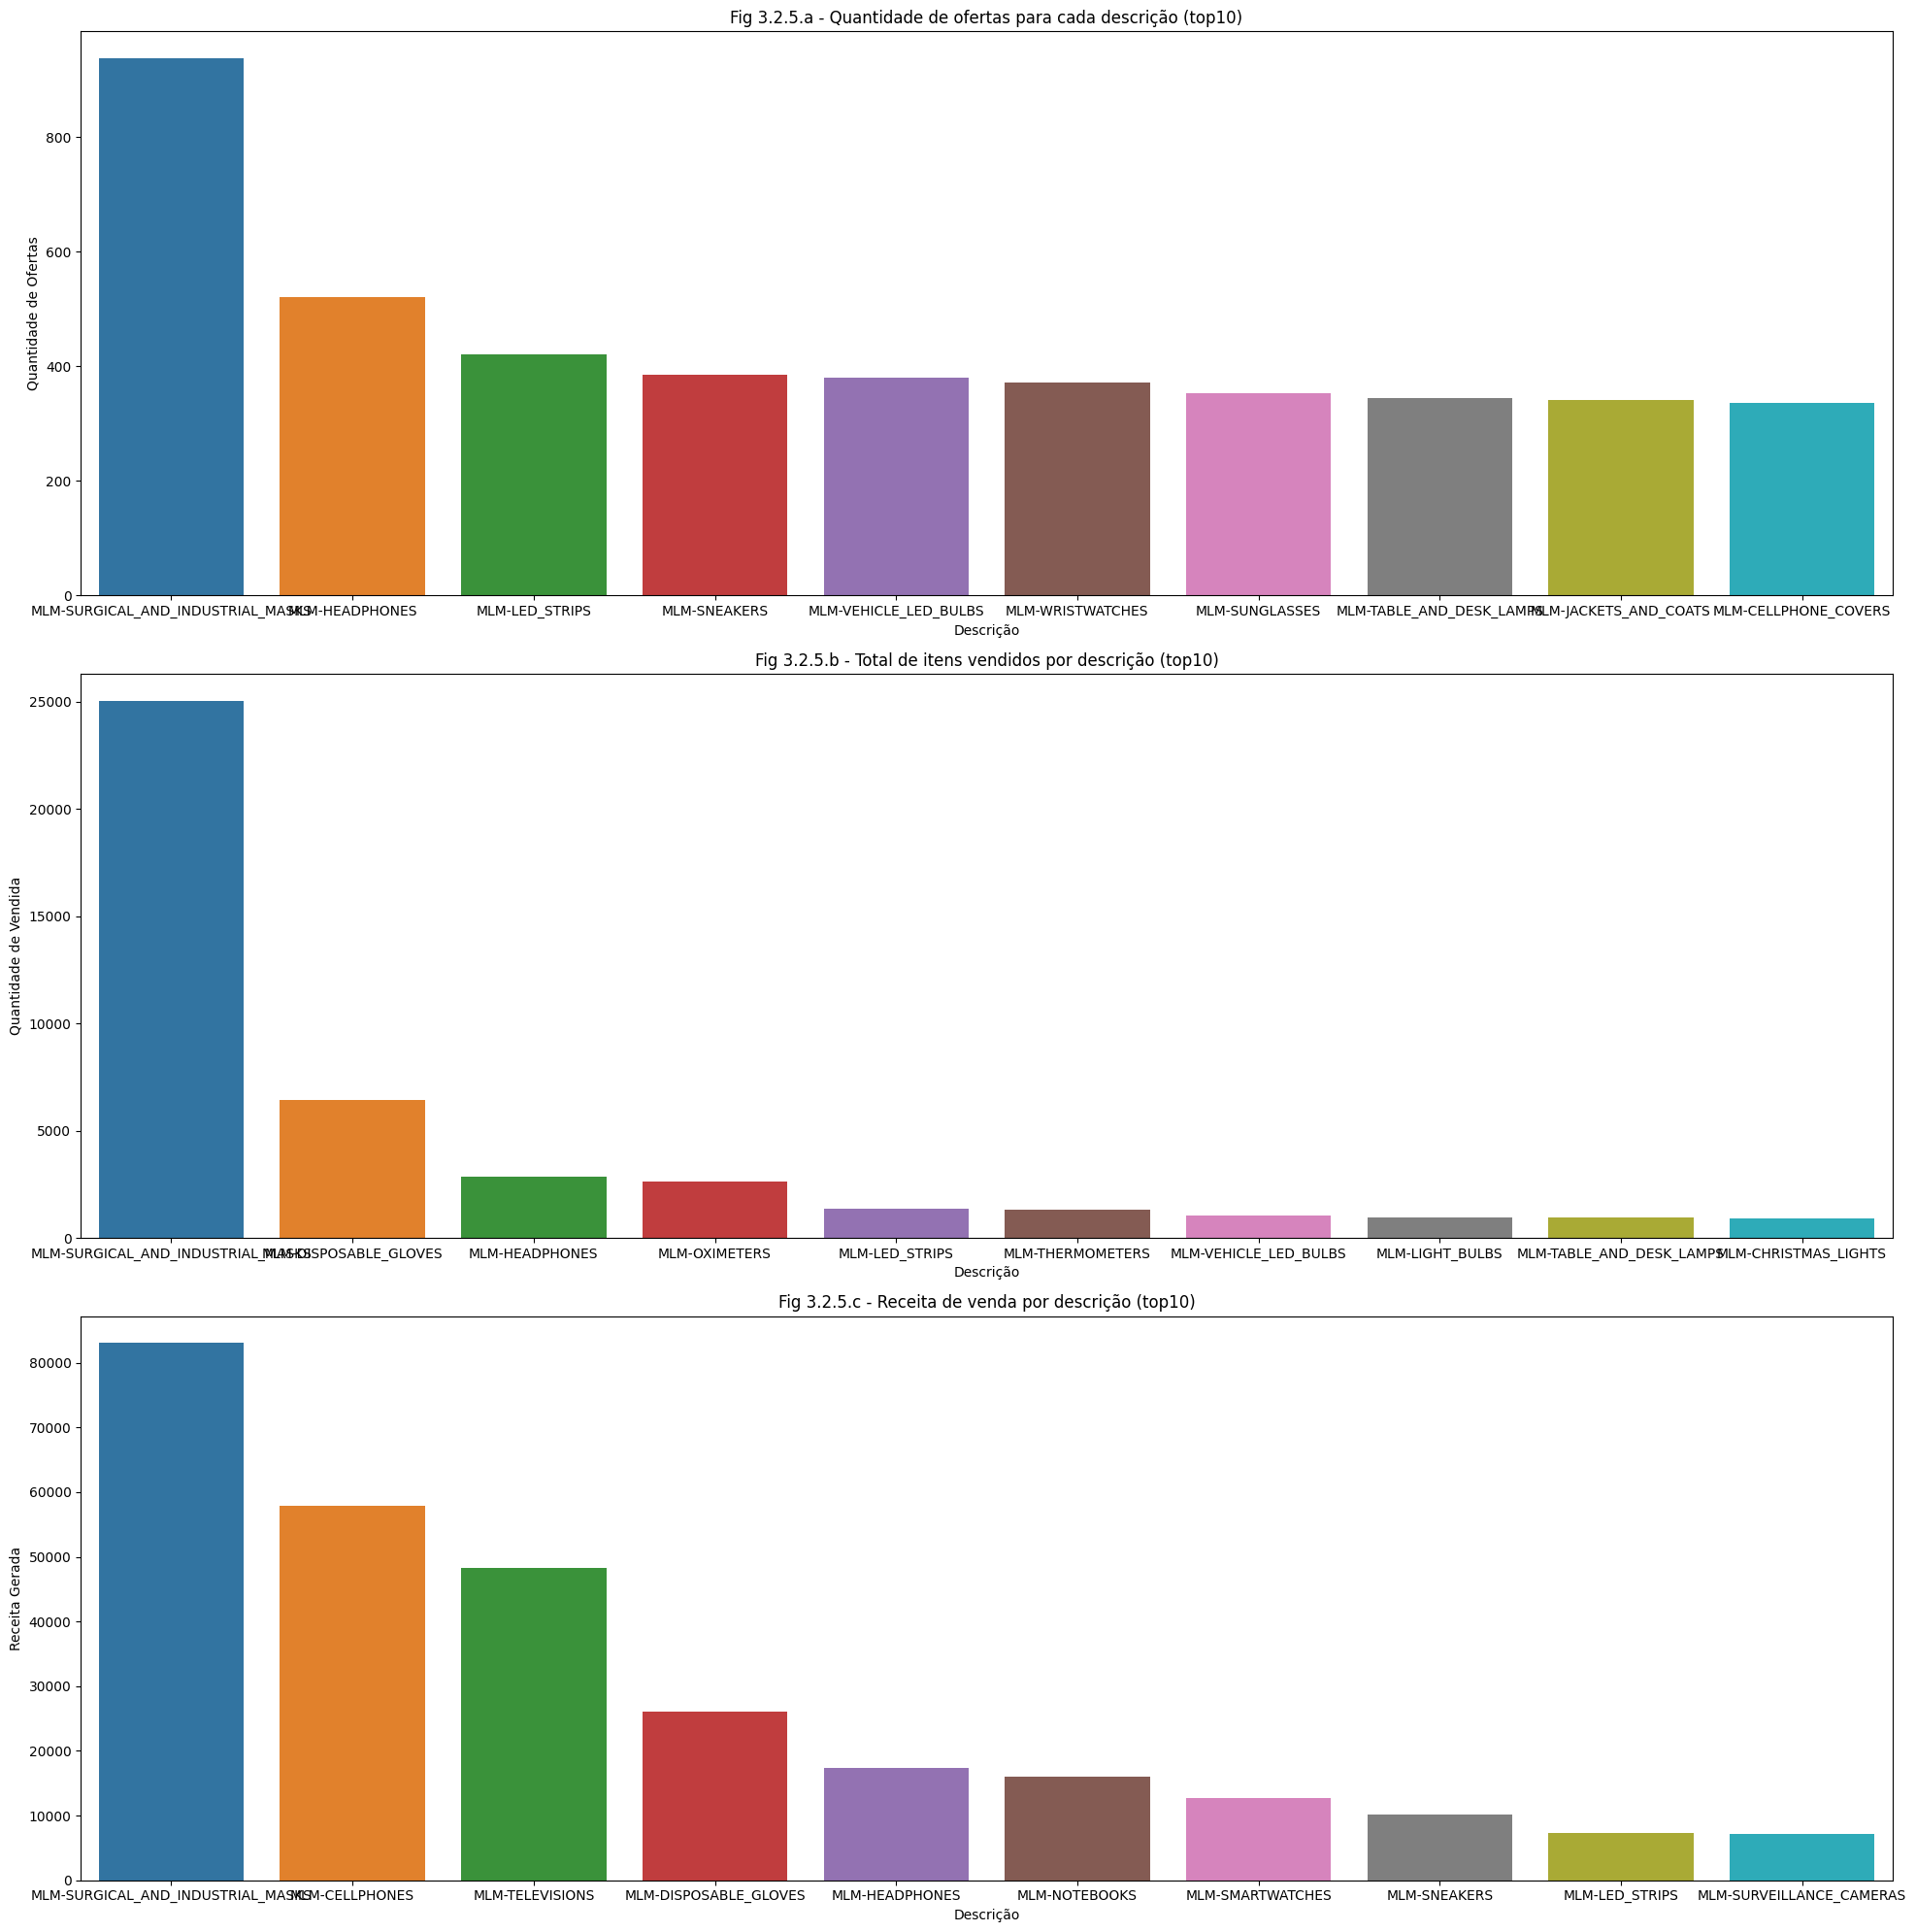

In [72]:
fig = plt.figure(figsize=(20, 20))

plt.subplot(3, 1, 1)
sns.barplot(
    data=dataframe[['DOMAIN_ID', 'OFFER_TYPE']].groupby(['DOMAIN_ID']).count().reset_index(drop=False).sort_values(['OFFER_TYPE'], ascending=False).head(10),
    x='DOMAIN_ID',
    y='OFFER_TYPE'
)

plt.xlabel(
    'Descrição',
    fontsize=10
)
plt.ylabel(
    'Quantidade de Ofertas',
    fontsize=10
)
plt.title(
    'Fig 3.2.5.a - Quantidade de ofertas para cada descrição (top10)',
    fontsize=12
)

plt.subplot(3, 1, 2)
sns.barplot(
    data=dataframe[['DOMAIN_ID', 'SOLD_QUANTITY']].groupby(['DOMAIN_ID']).sum().reset_index(drop=False).sort_values(['SOLD_QUANTITY'], ascending=False).head(10),
    x='DOMAIN_ID',
    y='SOLD_QUANTITY'
)

plt.xlabel(
    'Descrição',
    fontsize=10
)
plt.ylabel(
    'Quantidade de Vendida',
    fontsize=10
)
plt.title(
    'Fig 3.2.5.b - Total de itens vendidos por descrição (top10)',
    fontsize=12
)

plt.subplot(3, 1, 3)
sns.barplot(
    data=dataframe[['DOMAIN_ID', 'SOLD_AMOUNT']].groupby(['DOMAIN_ID']).sum().reset_index(drop=False).sort_values(['SOLD_AMOUNT'], ascending=False).head(10),
    x='DOMAIN_ID',
    y='SOLD_AMOUNT'
)

plt.xlabel(
    'Descrição',
    fontsize=10
)
plt.ylabel(
    'Receita Gerada',
    fontsize=10
)
plt.title(
    'Fig 3.2.5.c - Receita de venda por descrição (top10)',
    fontsize=12
)

plt.tight_layout()
plt.show()

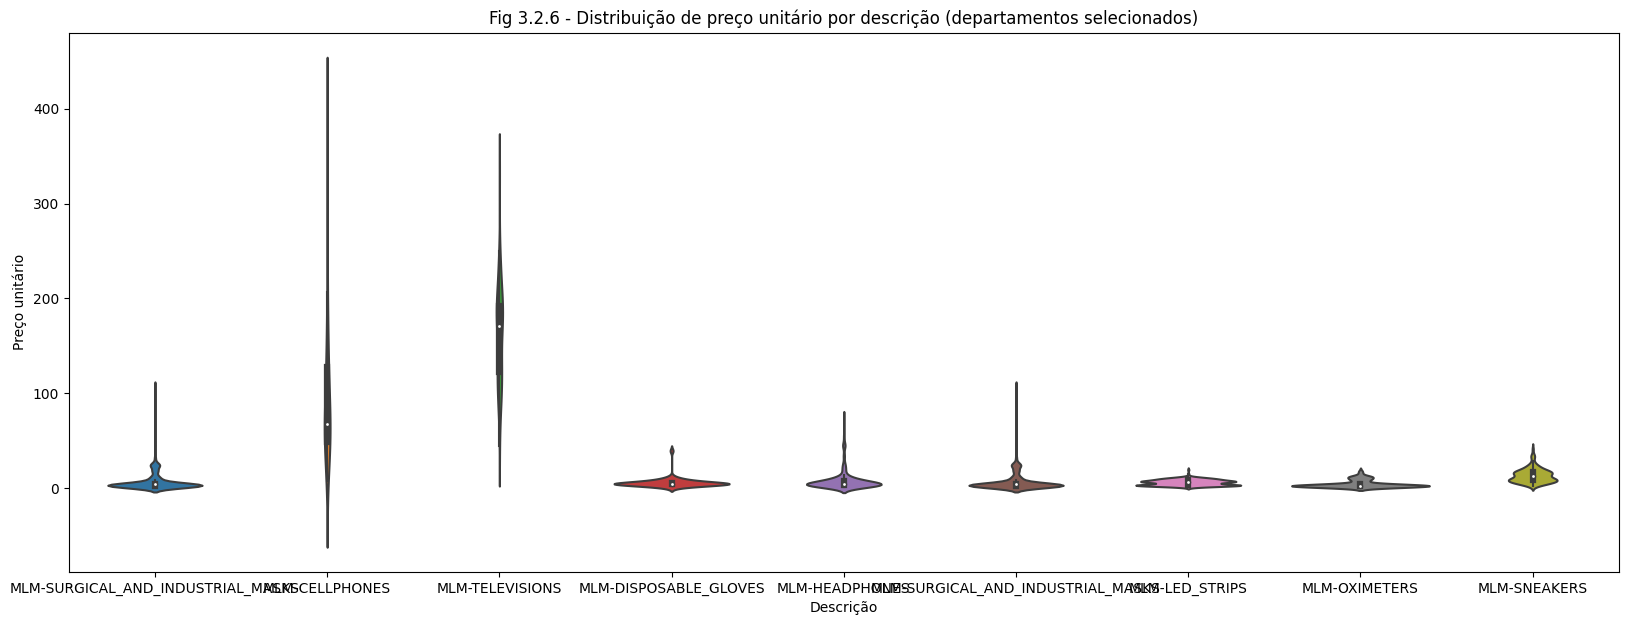

In [73]:
list_DOMAIN_ID = ['MLM-SURGICAL_AND_INDUSTRIAL_MASKS', 'MLM-CELLPHONES', 'MLM-TELEVISIONS', 'MLM-DISPOSABLE_GLOVES', 'MLM-HEADPHONES', 'MLM-SURGICAL_AND_INDUSTRIAL_MASKS', 'MLM-LED_STRIPS', 'MLM-OXIMETERS', 'MLM-SNEAKERS']

fig = plt.figure(figsize=(20, 7))

sns.violinplot(
    data=dataframe[
        (dataframe['DOMAIN_ID'].isin(list_DOMAIN_ID)) &
        (dataframe['UNIT_PRICE']!=-999)
    ],
    x='DOMAIN_ID',
    y='UNIT_PRICE',
    order=list_DOMAIN_ID
)

plt.xlabel(
    'Descrição',
    fontsize=10
)
plt.ylabel(
    'Preço unitário',
    fontsize=10
)
plt.title(
    'Fig 3.2.6 - Distribuição de preço unitário por descrição (departamentos selecionados)',
    fontsize=12
)

plt.show()

In [74]:
for desc in list_DOMAIN_ID:
    df_ = dataframe[
        (dataframe['DOMAIN_ID']==desc) &
        (dataframe['UNIT_PRICE']!=-999)
    ]
    print('{}: menor preço: {} | maior preço: {} | range: {}\n'.format(desc, df_['UNIT_PRICE'].min(), df_['UNIT_PRICE'].max(), (df_['UNIT_PRICE'].max()-df_['UNIT_PRICE'].min())))

MLM-SURGICAL_AND_INDUSTRIAL_MASKS: menor preço: 0.46 | maior preço: 107.16 | range: 106.7

MLM-CELLPHONES: menor preço: 6.87 | maior preço: 385.04 | range: 378.17

MLM-TELEVISIONS: menor preço: 44.38 | maior preço: 331.34 | range: 286.96

MLM-DISPOSABLE_GLOVES: menor preço: 0.71 | maior preço: 40.11 | range: 39.4

MLM-HEADPHONES: menor preço: 1.21 | maior preço: 74.52 | range: 73.31

MLM-SURGICAL_AND_INDUSTRIAL_MASKS: menor preço: 0.46 | maior preço: 107.16 | range: 106.7

MLM-LED_STRIPS: menor preço: 0.8 | maior preço: 19.22 | range: 18.419999999999998

MLM-OXIMETERS: menor preço: 0.62 | maior preço: 17.72 | range: 17.099999999999998

MLM-SNEAKERS: menor preço: 2.45 | maior preço: 41.73 | range: 39.279999999999994



In [75]:
for desc in dataframe[dataframe['DOMAIN_ID'].isin(list_DOMAIN_ID)]['DOMAIN_ID'].unique():
    df_ = dataframe[dataframe['DOMAIN_ID']==desc]

    print('{}: {} | {}\n'.format(desc, df_['DOM_DOMAIN_AGG1'].unique(), df_['VERTICAL'].unique()))

MLM-HEADPHONES: ['COMPUTERS'] | ['CE']

MLM-TELEVISIONS: ['ELECTRONICS'] | ['CE']

MLM-OXIMETERS: ['BEAUTY EQUIPMENT'] | ['BEAUTY & HEALTH']

MLM-SURGICAL_AND_INDUSTRIAL_MASKS: ['PHARMACEUTICS'] | ['BEAUTY & HEALTH']

MLM-CELLPHONES: ['MOBILE'] | ['CE']

MLM-LED_STRIPS: ['HOME&DECOR'] | ['HOME & INDUSTRY']

MLM-SNEAKERS: ['FOOTWEAR'] | ['APP & SPORTS']

MLM-DISPOSABLE_GLOVES: ['BEAUTY EQUIPMENT'] | ['BEAUTY & HEALTH']



<span style="color:purple">**INFO**</span>: o top 10 descrições mais frequentes representa 10.1 % da base de ofertas analisada. O top 3, que representa 4.75 %, é formado por 'MLM-SURGICAL_AND_INDUSTRIAL_MASKS', 'MLM-HEADPHONES' e 'MLM-LED_STRIPS'. Diferente do que foi visto para as análises de departamentos e verticais, aqui o top 10 mais frequente representa uma pequena amostra do total da base analisada, que tem um total de 1202 descrições distintas.

<span style="color:purple">**INFO**</span>: o top 10 descrições com maior quantidade de itens vendidos representa 41.4 % da base analisada. O top 3, que representa 32.7 % do total de itens vendidos, é composto por 'MLM-SURGICAL_AND_INDUSTRIAL_MASKS', 'MLM-DISPOSABLE_GLOVES' (que não aparece no top 10 descrições com maior frequência) e 'MLM-HEADPHONES' (que ocupa a segunda posição de descrição mais frequente da base analisada).

<span style="color:purple">**INFO**</span>: o top 10 descrições com maior receita gerada representa 43.5 % da receita gerada pela base analisada. O top 3, que representa 28.8 % do total de receita, é composto por 'MLM-SURGICAL_AND_INDUSTRIAL_MASKS', 'MLM-CELLPHONES' e 'MLM-TELEVISIONS'.

<span style="color:purple">**INFO**</span>: dentre as descrições selecionadas, as descrições 'MLM-CELLPHONES' e 'MLM-TELEVISIONS' são as que apresentam os maiores ranges de preços unitários das ofertas (378.17 e 286.96, respectivamente). Interessante notar que, apesar de ocuparem o top 2 e top 3, respectivamente, em relação a quantidade de receita gerada, essas descrições não aparecem nos top 10 de descrições mais frequentes ou com maior quantidade de itens vendidos.

<span style="color:purple">**INFO**</span>: dentre as descrições selecionados, a descrição 'MLM-OXIMETERS' é o que apresenta o menor range de preços unitários das ofertas (17.10), com grande concentração em preços unitários baixos. Essa descrição ocupa a quarta posição em relação à quantidade de itens vendidos, contudo não aparece nos top 10 descrições com maior frequência ou com maior geração de receita.

<span style="color:purple">**INFO**</span>: o bom desempenho na quantidade de vendas das descrições 'MLM-SURGICAL_AND_INDUSTRIAL_MASKS', 'MLM-DISPOSABLE_GLOVES' e 'MLM-OXIMETERS' resultaram no alto share de contribuição da vertical 'BEAUTY & HEALTH' em relação a quantidade de itens vendidos dentro da base analisada. Contudo, devido a relação de preço unitário, é visto que as descrições 'MLM-CELLPHONES' e 'MLM-TELEVISIONS' ocupam grandes shares da receita de venda, contribuindo com o bom resultado observado na vertical 'CE'.

<span style="color:green">**INSIGHT**</span>: seguindo os insights levantandos nas análises dos departamentos e verticais, a descrição 'MLM-SURGICAL_AND_INDUSTRIAL_MASKS' aparece como top 1 em frequência, quantidade de itens e receita gerada, refletindo do cenário que era vivencidado na época das ações. Contudo, vemos uma grande contribuição das descrições 'MLM-CELLPHONES' e 'MLM-TELEVISIONS' no share da receita gerada, refletindo o consumo de itens mais caros no cenário da época.

----------------------------------------------------------

## 3.3 Sucesso das Ofertas

In [76]:
not_sold = dataframe[dataframe['SOLD_QUANTITY']==0].shape[0]
all_sold = dataframe[dataframe['SOLD_STOCK_PERC']==100].shape[0]
mean_sold = dataframe['SOLD_STOCK_PERC'].mean()

print('{} ofertas sem vendas ({:.2%} da base total)'.format(not_sold, not_sold/dataframe.shape[0]))
print('{} ofertas que venderam todo o estoque ({:.2%} da base total)'.format(all_sold, all_sold/dataframe.shape[0]))
print('A média de porcentagem de estoque vendido é de: {:.2f}%'.format(mean_sold))

19038 ofertas sem vendas (48.11% da base total)
2338 ofertas que venderam todo o estoque (5.91% da base total)
A média de porcentagem de estoque vendido é de: 18.05%


In [77]:
list_perc = [i*10 for i in range(11)]

for n in list_perc:
    if n < 50:
        print('{:.2%} das ofertas venderam igual ou menos de {}% do estoque'.format(dataframe[dataframe['SOLD_STOCK_PERC']<=n].shape[0]/dataframe.shape[0], n))
    elif n == 50:
        print('{:.2%} das ofertas venderam igual ou menos de {}% do estoque\n'.format(dataframe[dataframe['SOLD_STOCK_PERC']<=n].shape[0]/dataframe.shape[0], n))
        print('{:.2%} das ofertas venderam mais de {}% do estoque'.format(dataframe[dataframe['SOLD_STOCK_PERC']>n].shape[0]/dataframe.shape[0], n))
    else:
        print('{:.2%} das ofertas venderam igual ou mais de {}% do estoque'.format(dataframe[dataframe['SOLD_STOCK_PERC']>=n].shape[0]/dataframe.shape[0], n))

48.11% das ofertas venderam igual ou menos de 0% do estoque
60.26% das ofertas venderam igual ou menos de 10% do estoque
76.44% das ofertas venderam igual ou menos de 20% do estoque
79.27% das ofertas venderam igual ou menos de 30% do estoque
86.35% das ofertas venderam igual ou menos de 40% do estoque
87.61% das ofertas venderam igual ou menos de 50% do estoque

12.39% das ofertas venderam mais de 50% do estoque
11.68% das ofertas venderam igual ou mais de 60% do estoque
8.52% das ofertas venderam igual ou mais de 70% do estoque
8.04% das ofertas venderam igual ou mais de 80% do estoque
6.13% das ofertas venderam igual ou mais de 90% do estoque
5.91% das ofertas venderam igual ou mais de 100% do estoque


In [78]:
# análise do share de ofertas que não realizaram venda, distribuído pela duração das ações
for tdelta in sorted(dataframe['OFFER_TIME_DELTA'].unique()):
    print('OFFER_TIME_DELTA {}: share de ofertas sem vendas: {:.2%}'.format(tdelta, dataframe[(dataframe['SOLD_QUANTITY']==0) & (dataframe['OFFER_TIME_DELTA']==tdelta)].shape[0]/(dataframe[dataframe['OFFER_TIME_DELTA']==tdelta].shape[0]+1e-10)))

OFFER_TIME_DELTA 0.0: share de ofertas sem vendas: 60.67%
OFFER_TIME_DELTA 1.0: share de ofertas sem vendas: 5.03%
OFFER_TIME_DELTA 2.0: share de ofertas sem vendas: 2.45%
OFFER_TIME_DELTA 3.0: share de ofertas sem vendas: 1.65%
OFFER_TIME_DELTA 4.0: share de ofertas sem vendas: 0.82%
OFFER_TIME_DELTA 5.0: share de ofertas sem vendas: 4.13%
OFFER_TIME_DELTA 6.0: share de ofertas sem vendas: 48.34%
OFFER_TIME_DELTA 7.0: share de ofertas sem vendas: 46.35%
OFFER_TIME_DELTA 8.0: share de ofertas sem vendas: 62.33%
OFFER_TIME_DELTA 9.0: share de ofertas sem vendas: 76.92%
OFFER_TIME_DELTA 10.0: share de ofertas sem vendas: 50.00%
OFFER_TIME_DELTA 11.0: share de ofertas sem vendas: 50.00%
OFFER_TIME_DELTA 12.0: share de ofertas sem vendas: 52.34%
OFFER_TIME_DELTA 15.0: share de ofertas sem vendas: 33.33%
OFFER_TIME_DELTA 16.0: share de ofertas sem vendas: 100.00%


In [79]:
# análise do share de ofertas que não realizaram, distribuído pela duração das ações
for tdelta in sorted(dataframe['OFFER_TIME_DELTA'].unique()):
    print('OFFER_TIME_DELTA {}: share de ofertas que venderam todo o estoque: {:.2%}'.format(tdelta, dataframe[(dataframe['SOLD_STOCK_PERC']==100) & (dataframe['OFFER_TIME_DELTA']==tdelta)].shape[0]/(dataframe[dataframe['OFFER_TIME_DELTA']==tdelta].shape[0]+1e-10)))

OFFER_TIME_DELTA 0.0: share de ofertas que venderam todo o estoque: 39.33%
OFFER_TIME_DELTA 1.0: share de ofertas que venderam todo o estoque: 94.41%
OFFER_TIME_DELTA 2.0: share de ofertas que venderam todo o estoque: 94.48%
OFFER_TIME_DELTA 3.0: share de ofertas que venderam todo o estoque: 97.25%
OFFER_TIME_DELTA 4.0: share de ofertas que venderam todo o estoque: 95.50%
OFFER_TIME_DELTA 5.0: share de ofertas que venderam todo o estoque: 75.73%
OFFER_TIME_DELTA 6.0: share de ofertas que venderam todo o estoque: 1.17%
OFFER_TIME_DELTA 7.0: share de ofertas que venderam todo o estoque: 1.85%
OFFER_TIME_DELTA 8.0: share de ofertas que venderam todo o estoque: 0.14%
OFFER_TIME_DELTA 9.0: share de ofertas que venderam todo o estoque: 0.00%
OFFER_TIME_DELTA 10.0: share de ofertas que venderam todo o estoque: 0.00%
OFFER_TIME_DELTA 11.0: share de ofertas que venderam todo o estoque: 0.00%
OFFER_TIME_DELTA 12.0: share de ofertas que venderam todo o estoque: 0.00%
OFFER_TIME_DELTA 15.0: share 

<span style="color:purple">**INFO**</span>: 48.1 % das ofertas da base analisada não realizaram vendas durante o período das ações, enquanto que 60.3 % das ações venderam 10 % ou menos do estoque disponibilizado.

<span style="color:purple">**INFO**</span>: 8.0 % das ofertas venderam 80 % ou mais do estoque disponibilizado para o período das ações, enquanto que 5.9% das ofertas analisadas venderam todo o estoque.

<span style="color:green">**INSIGHT**</span>: com 18.0 % de média da porcentagem de estoque vendido, podemos considerar como favoráveis as ações que venderam 20 % ou mais de seu estoque de oferta. A partir desse limiar, 23.6 % das ofertas analisados foram favoráveis.

<span style="color:green">**INSIGHT**</span>: nota-se o aumento considerável no share de ofertas que não realizaram vendas para aquelas ações com seis horas ou mais de duração.

<span style="color:green">**INSIGHT**</span>: é possível observar elevado share de ofertas que venderam todo o estoque disponível para ações com duração entre uma e cinco horas. Acima desse tempo, o share de ofertas que zeraram seu estoque cai drasticamente, chegando a zero para ações com duração maior que nove horas.

----------------------------------------------------------

In [80]:
total_quantity = dataframe['SOLD_QUANTITY'].sum()
total_amount = dataframe['SOLD_AMOUNT'].sum()

print('Total de itens vendidos durante o período analisado: {}'.format(total_quantity))
print('Total de receita gerada durante o período analisado: {}'.format(total_amount))

Total de itens vendidos durante o período analisado: 105117
Total de receita gerada durante o período analisado: 656479.54


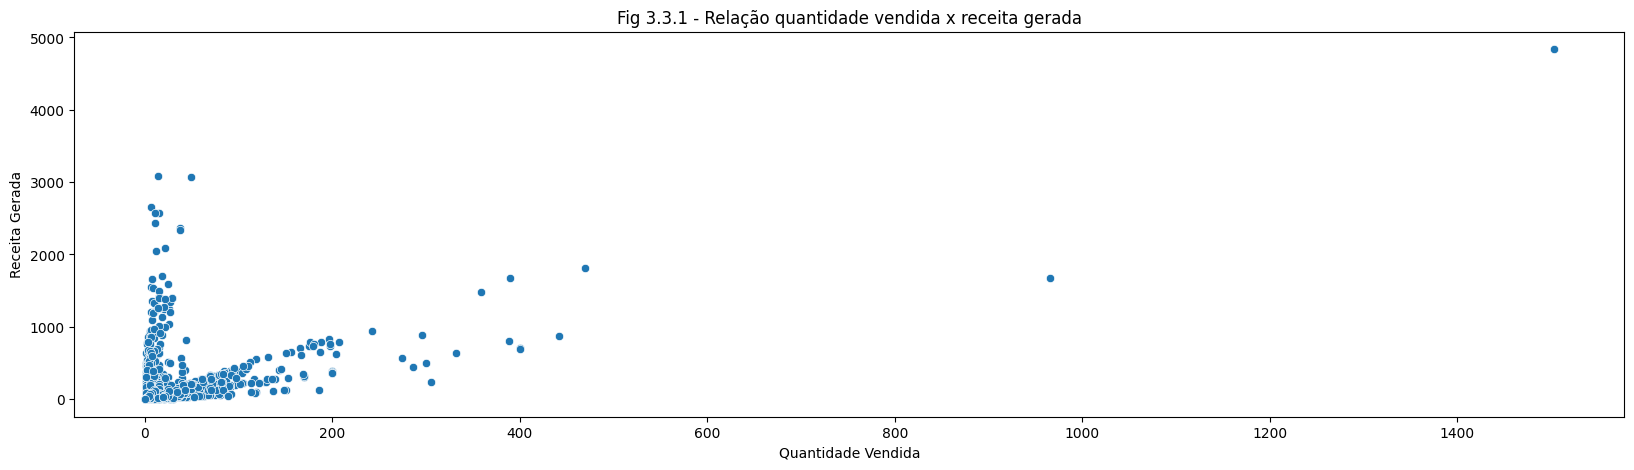

In [81]:
fig = plt.figure(figsize=(20, 5))

sns.scatterplot(
    data=dataframe,
    x='SOLD_QUANTITY',
    y='SOLD_AMOUNT'
)

plt.xlabel(
    'Quantidade Vendida',
    fontsize=10
)
plt.ylabel(
    'Receita Gerada',
    fontsize=10
)
plt.title(
    'Fig 3.3.1 - Relação quantidade vendida x receita gerada',
    fontsize=12
)

plt.show()

In [82]:
mean_UNIT_PRICE = dataframe[dataframe['UNIT_PRICE']!=-999]['UNIT_PRICE'].mean()
above_mean_total = dataframe[dataframe['UNIT_PRICE']>mean_UNIT_PRICE]['SOLD_AMOUNT'].sum()
above_mean_count = dataframe[dataframe['UNIT_PRICE']>mean_UNIT_PRICE]['OFFER_TYPE'].count()
below_mean_total = dataframe[
    (dataframe['UNIT_PRICE']!=-999) &
    (dataframe['UNIT_PRICE']<=mean_UNIT_PRICE)
]['SOLD_AMOUNT'].sum()
below_mean_count = dataframe[
    (dataframe['UNIT_PRICE']!=-999) &
    (dataframe['UNIT_PRICE']<=mean_UNIT_PRICE)
]['OFFER_TYPE'].count()
did_sold_count = dataframe[dataframe['SOLD_AMOUNT']>0].shape[0]

print('{} ofertas ({:.2%} da base que realizou vendas) com valores unitários acima da média gerando uma receita de {:.2f} ({:.2%} da receita total)'.format(above_mean_count, above_mean_count/did_sold_count, above_mean_total, above_mean_total/dataframe['SOLD_AMOUNT'].sum()))
print('{} ofertas ({:.2%} da base que realizou vendas) com valores unitários abaixo ou igual da média gerando uma receita de {:.2f} ({:.2%} da receita total)'.format(below_mean_count, below_mean_count/did_sold_count, below_mean_total, below_mean_total/dataframe['SOLD_AMOUNT'].sum()))

4439 ofertas (21.61% da base que realizou vendas) com valores unitários acima da média gerando uma receita de 360424.42 (54.90% da receita total)
16098 ofertas (78.39% da base que realizou vendas) com valores unitários abaixo ou igual da média gerando uma receita de 296055.12 (45.10% da receita total)


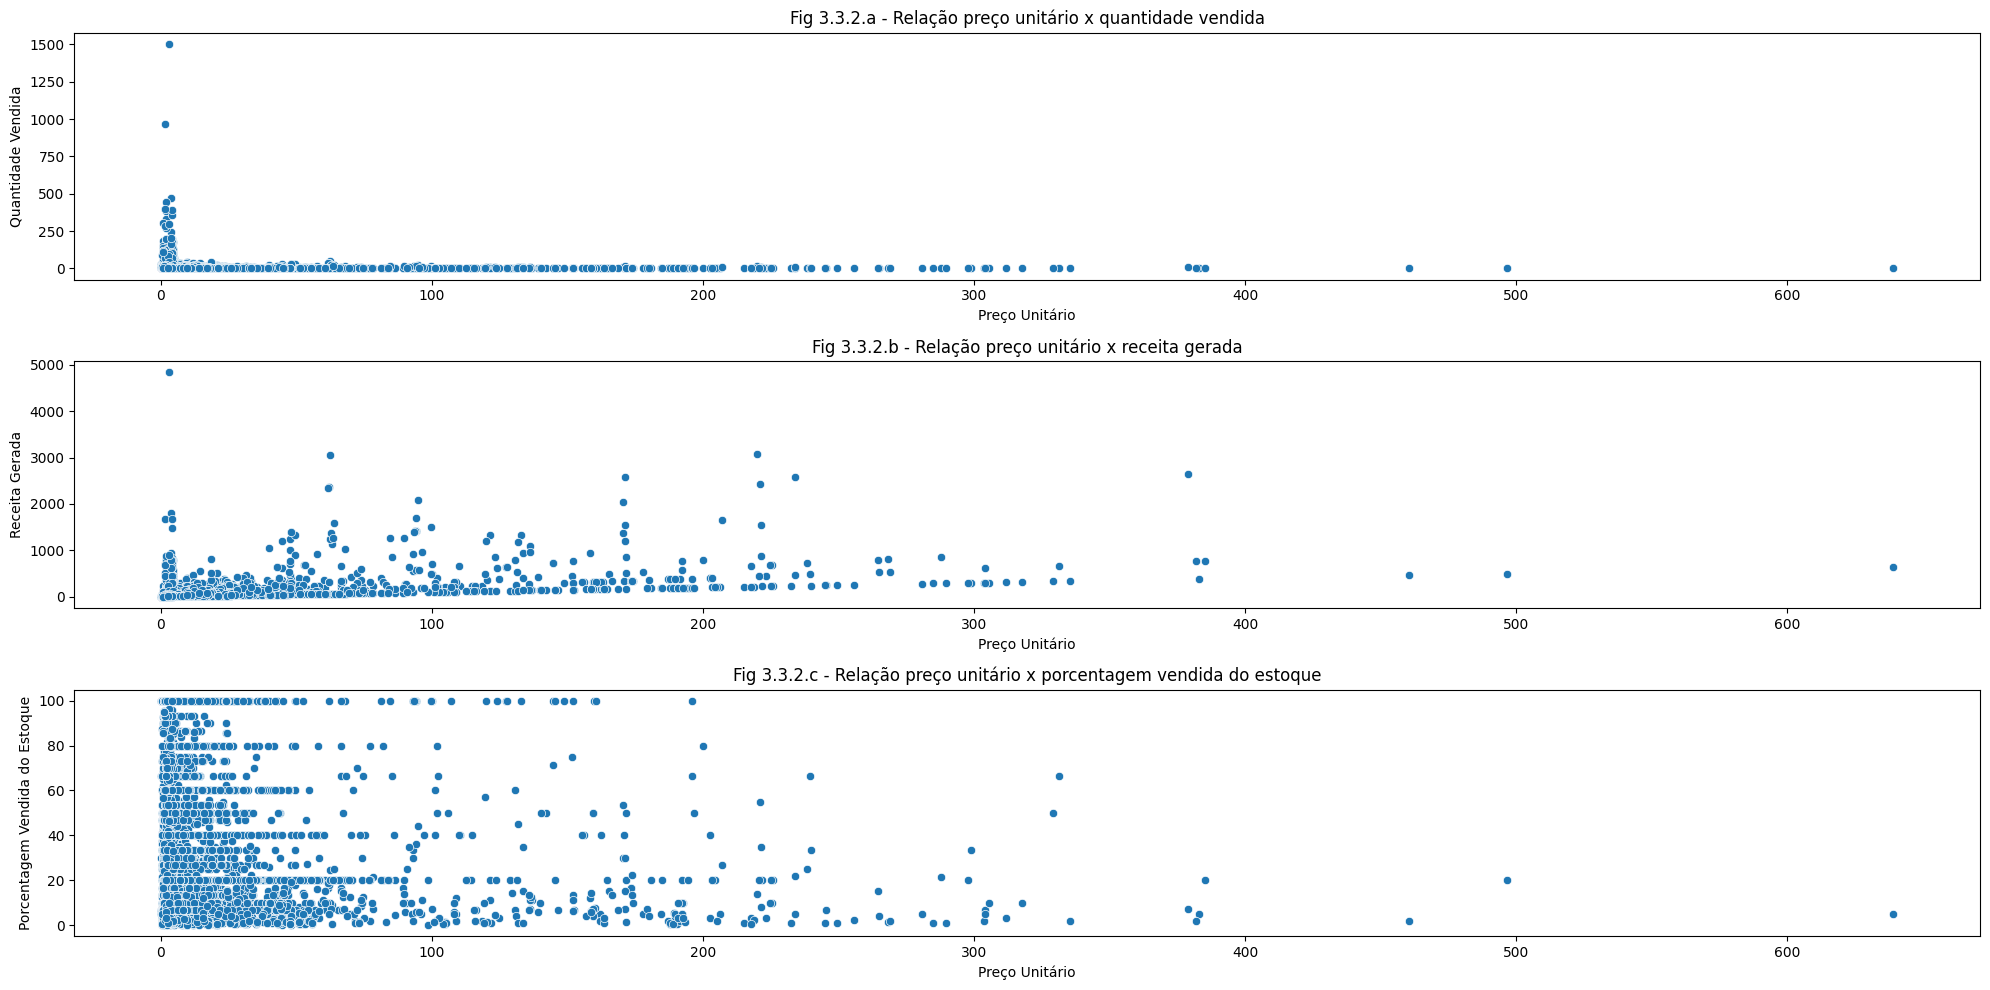

In [83]:
fig = plt.figure(figsize=(20, 10))

plt.subplot(3, 1, 1)
sns.scatterplot(
    data=dataframe[dataframe['UNIT_PRICE']!=-999],
    x='UNIT_PRICE',
    y='SOLD_QUANTITY'
)

plt.xlabel(
    'Preço Unitário',
    fontsize=10
)
plt.ylabel(
    'Quantidade Vendida',
    fontsize=10
)
plt.title(
    'Fig 3.3.2.a - Relação preço unitário x quantidade vendida',
    fontsize=12
)

plt.subplot(3, 1, 2)
sns.scatterplot(
    data=dataframe[dataframe['UNIT_PRICE']!=-999],
    x='UNIT_PRICE',
    y='SOLD_AMOUNT'
)

plt.xlabel(
    'Preço Unitário',
    fontsize=10
)
plt.ylabel(
    'Receita Gerada',
    fontsize=10
)
plt.title(
    'Fig 3.3.2.b - Relação preço unitário x receita gerada',
    fontsize=12
)

plt.subplot(3, 1, 3)
sns.scatterplot(
    data=dataframe[dataframe['UNIT_PRICE']!=-999],
    x='UNIT_PRICE',
    y='SOLD_STOCK_PERC'
)

plt.xlabel(
    'Preço Unitário',
    fontsize=10
)
plt.ylabel(
    'Porcentagem Vendida do Estoque',
    fontsize=10
)
plt.title(
    'Fig 3.3.2.c - Relação preço unitário x porcentagem vendida do estoque',
    fontsize=12
)

plt.tight_layout()
plt.show()

In [84]:
print('Correlação de Pearson:')
print(dataframe[dataframe['UNIT_PRICE']!=-999][['UNIT_PRICE', 'SOLD_QUANTITY']].corr('pearson'))

print('\nCorrelação de Spearman:')
print(dataframe[dataframe['UNIT_PRICE']!=-999][['UNIT_PRICE', 'SOLD_QUANTITY']].corr('spearman'))

Correlação de Pearson:
               UNIT_PRICE  SOLD_QUANTITY
UNIT_PRICE       1.000000      -0.031526
SOLD_QUANTITY   -0.031526       1.000000

Correlação de Spearman:
               UNIT_PRICE  SOLD_QUANTITY
UNIT_PRICE       1.000000      -0.189961
SOLD_QUANTITY   -0.189961       1.000000


<span style="color:purple">**INFO**</span>: durante o período de oferta, e a partir da base utilizada para análise, foram vendidos 105117 itens, gerando 656479.54 de receita total.

<span style="color:green">**INSIGHT**</span>: 78.4 % das vendas realizadas foram de ofertas com preço unitário igual ou abaixo da média (levando em conta apenas ações que tiveram vendas), contudo essas ofertas representam apenas 45.1 % da receita total gerada. Portanto, a partir da base analisada, 54.9 % da receita total veio de 21.6 % das ofertas que realizaram venda (estas com valor unitário acima da média). 

<span style="color:green">**INSIGHT**</span>: é possível observar uma queda na venda total do estoque para ações com valores unitários acima de 50.00. Para ações com valores unitários acima de 200.00 nota-se uma predominância na venda de menos da metade do estoque.

----------------------------------------------------------

## 3.4 Modalidade do Frete

In [85]:
free_shipping = dataframe[dataframe['SHIPPING_PAYMENT_TYPE']=='free_shipping'].shape[0]
none_shipping = dataframe[dataframe['SHIPPING_PAYMENT_TYPE']=='none'].shape[0]

print('Quantidade de ofertas na modalidade free_shipping: {} ({:.2%} da base total)'.format(free_shipping, free_shipping/dataframe.shape[0]))
print('Quantidade de ofertas sem a modalidade free_shipping: {} ({:.2%} da base total)'.format(none_shipping, none_shipping/dataframe.shape[0]))

Quantidade de ofertas na modalidade free_shipping: 21890 (55.31% da base total)
Quantidade de ofertas sem a modalidade free_shipping: 17685 (44.69% da base total)


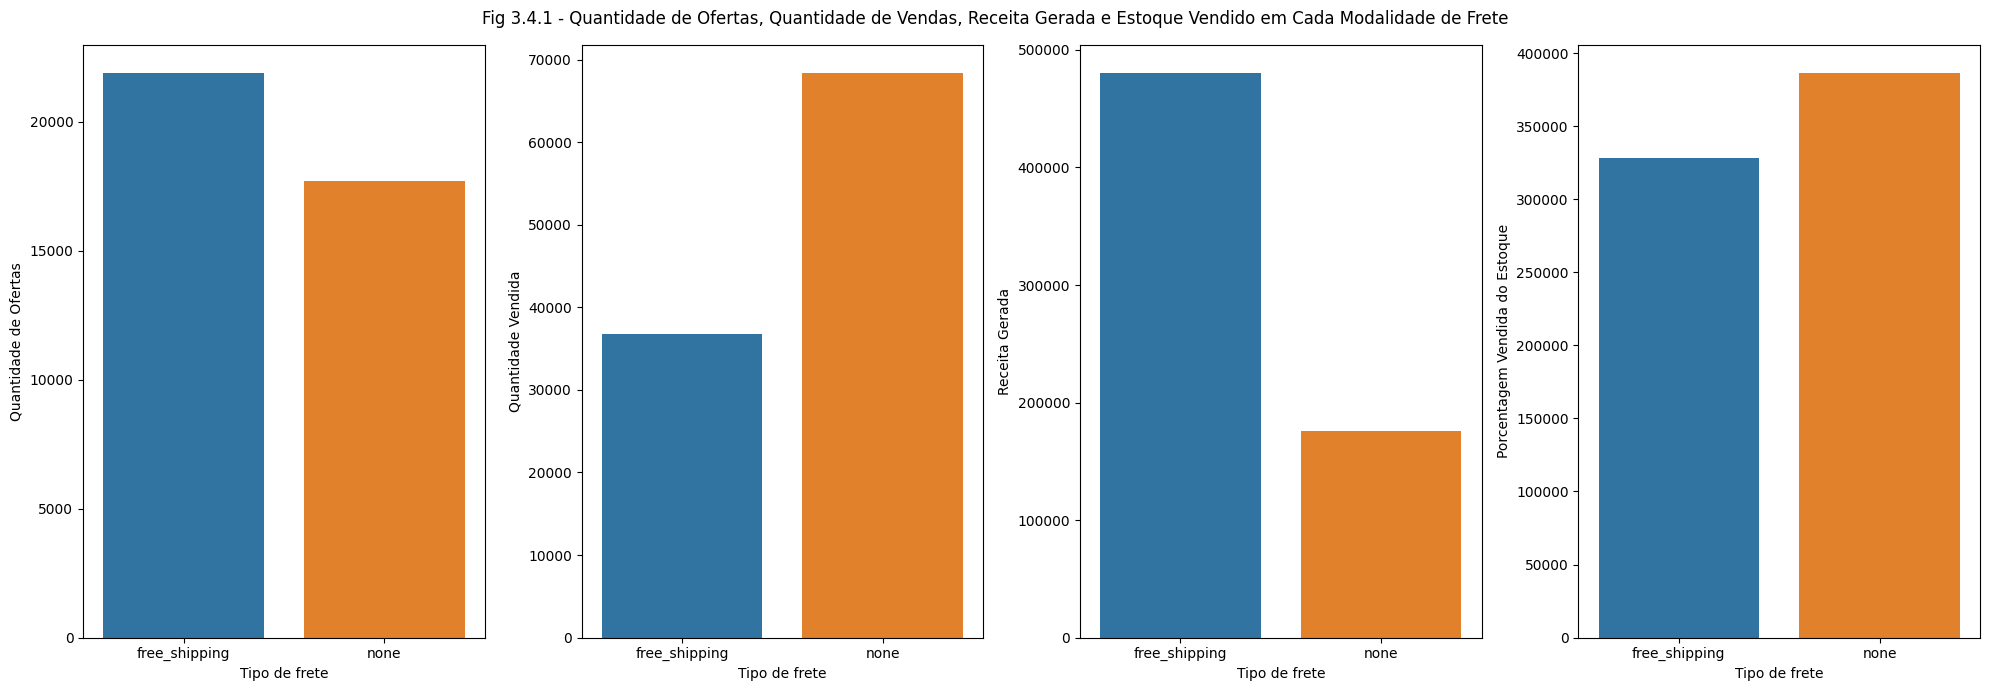

In [86]:
fig = plt.figure(figsize=(20, 7))
plt.suptitle(
    'Fig 3.4.1 - Quantidade de Ofertas, Quantidade de Vendas, Receita Gerada e Estoque Vendido em Cada Modalidade de Frete',
    fontsize=12
)

plt.subplot(1, 4 ,1)
sns.countplot(
    data=dataframe,
    x='SHIPPING_PAYMENT_TYPE'
)
plt.xlabel(
    'Tipo de frete',
    fontsize=10
)
plt.ylabel(
    'Quantidade de Ofertas',
    fontsize=10
)

plt.subplot(1, 4, 2)
sns.barplot(
    data=dataframe[['SHIPPING_PAYMENT_TYPE', 'SOLD_QUANTITY']].groupby(['SHIPPING_PAYMENT_TYPE']).sum().reset_index(drop=False),
    x='SHIPPING_PAYMENT_TYPE',
    y='SOLD_QUANTITY'
)
plt.xlabel(
    'Tipo de frete',
    fontsize=10
)
plt.ylabel(
    'Quantidade Vendida',
    fontsize=10
)

plt.subplot(1, 4, 3)
sns.barplot(
    data=dataframe[['SHIPPING_PAYMENT_TYPE', 'SOLD_AMOUNT']].groupby(['SHIPPING_PAYMENT_TYPE']).sum().reset_index(drop=False),
    x='SHIPPING_PAYMENT_TYPE',
    y='SOLD_AMOUNT'
)
plt.xlabel(
    'Tipo de frete',
    fontsize=10
)
plt.ylabel(
    'Receita Gerada',
    fontsize=10
)


plt.subplot(1, 4, 4)
sns.barplot(
    data=dataframe[['SHIPPING_PAYMENT_TYPE', 'SOLD_STOCK_PERC']].groupby(['SHIPPING_PAYMENT_TYPE']).sum().reset_index(drop=False),
    x='SHIPPING_PAYMENT_TYPE',
    y='SOLD_STOCK_PERC'
)
plt.xlabel(
    'Tipo de frete',
    fontsize=10
)
plt.ylabel(
    'Porcentagem Vendida do Estoque',
    fontsize=10
)

plt.tight_layout()
plt.show()

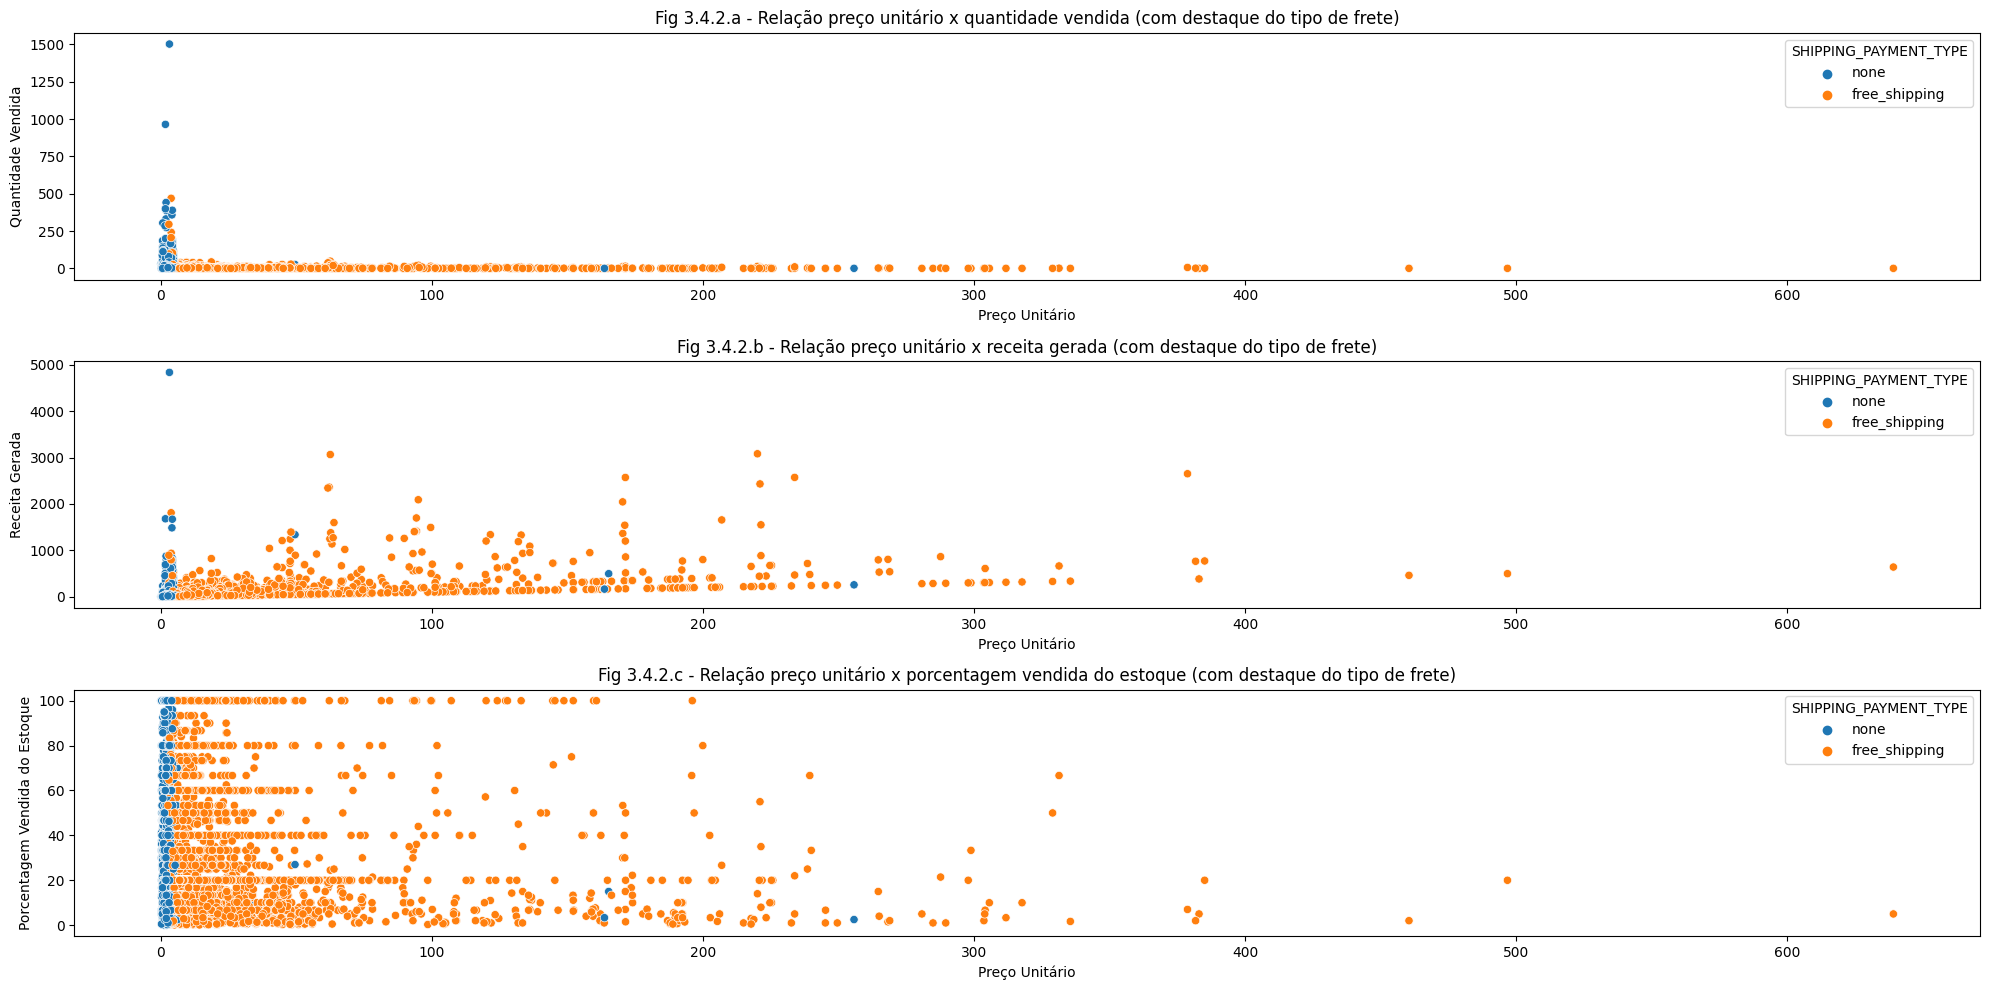

In [87]:
fig = plt.figure(figsize=(20, 10))

plt.subplot(3, 1, 1)
sns.scatterplot(
    data=dataframe[dataframe['UNIT_PRICE']!=-999],
    x='UNIT_PRICE',
    y='SOLD_QUANTITY',
    hue='SHIPPING_PAYMENT_TYPE'
)

plt.xlabel(
    'Preço Unitário',
    fontsize=10
)
plt.ylabel(
    'Quantidade Vendida',
    fontsize=10
)
plt.title(
    'Fig 3.4.2.a - Relação preço unitário x quantidade vendida (com destaque do tipo de frete)',
    fontsize=12
)

plt.subplot(3, 1, 2)
sns.scatterplot(
    data=dataframe[dataframe['UNIT_PRICE']!=-999],
    x='UNIT_PRICE',
    y='SOLD_AMOUNT',
    hue='SHIPPING_PAYMENT_TYPE'
)

plt.xlabel(
    'Preço Unitário',
    fontsize=10
)
plt.ylabel(
    'Receita Gerada',
    fontsize=10
)
plt.title(
    'Fig 3.4.2.b - Relação preço unitário x receita gerada (com destaque do tipo de frete)',
    fontsize=12
)

plt.subplot(3, 1, 3)
sns.scatterplot(
    data=dataframe[dataframe['UNIT_PRICE']!=-999],
    x='UNIT_PRICE',
    y='SOLD_STOCK_PERC',
    hue='SHIPPING_PAYMENT_TYPE'
)

plt.xlabel(
    'Preço Unitário',
    fontsize=10
)
plt.ylabel(
    'Porcentagem Vendida do Estoque',
    fontsize=10
)
plt.title(
    'Fig 3.4.2.c - Relação preço unitário x porcentagem vendida do estoque (com destaque do tipo de frete)',
    fontsize=12
)

plt.tight_layout()
plt.show()

<span style="color:purple">**INFO**</span>: dentro da base utilizada para análise, 55.3 % das ofertas possuem tipo de frete 'free_shipping'.

<span style="color:green">**INSIGHT**</span>: o tipo de frete 'free_shipping' não parece ter relação com a quantidade vendida nas ofertas analisadas. Contudo, é possível observar a relação dessa modalidade com ofertas de maior preço unitário, resultando em uma maior receita gerada para ofertas com 'free_shipping'.

----------------------------------------------------------

## 3.5 Tipo de Vendedor

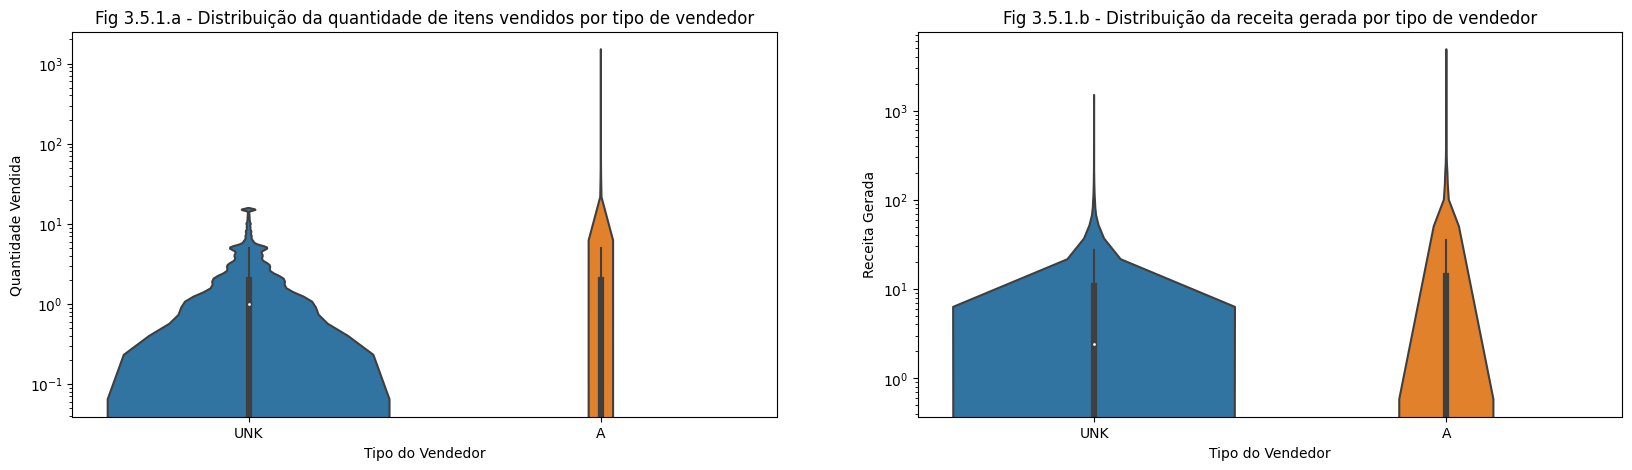

In [88]:
fig = plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.violinplot(
    data=dataframe,
    x='ORIGIN',
    y='SOLD_QUANTITY'
)

plt.xlabel(
    'Tipo do Vendedor',
    fontsize=10
)
plt.ylabel(
    'Quantidade Vendida',
    fontsize=10
)
plt.yscale('log')
plt.title(
    'Fig 3.5.1.a - Distribuição da quantidade de itens vendidos por tipo de vendedor',
    fontsize=12
)

plt.subplot(1, 2, 2)
sns.violinplot(
    data=dataframe,
    x='ORIGIN',
    y='SOLD_AMOUNT'
)

plt.xlabel(
    'Tipo do Vendedor',
    fontsize=10
)
plt.ylabel(
    'Receita Gerada',
    fontsize=10
)
plt.yscale('log')
plt.title(
    'Fig 3.5.1.b - Distribuição da receita gerada por tipo de vendedor',
    fontsize=12
)

plt.show()

In [89]:
seller_a_sold = dataframe[dataframe['ORIGIN']=='A']['SOLD_QUANTITY'].sum()
seller_a_amount = dataframe[dataframe['ORIGIN']=='A']['SOLD_AMOUNT'].sum()
seller_unk_sold = dataframe[dataframe['ORIGIN']=='UNK']['SOLD_QUANTITY'].sum()
seller_unk_amount = dataframe[dataframe['ORIGIN']=='UNK']['SOLD_AMOUNT'].sum()

print('Vendedores A venderam um total de {} itens ({:.2%} da base analisada) gerando uma receita de {} ({:.2%} do total de receita gerada)'.format(seller_a_sold, seller_a_sold/dataframe['SOLD_QUANTITY'].sum(), seller_a_amount, seller_a_amount/dataframe['SOLD_AMOUNT'].sum()))
print('Vendedores UNK venderam um total de {} itens ({:.2%} da base analisada) gerando uma receita de {} ({:.2%} do total de receita gerada)'.format(seller_unk_sold, seller_unk_sold/dataframe['SOLD_QUANTITY'].sum(), seller_unk_amount, seller_unk_amount/dataframe['SOLD_AMOUNT'].sum()))

Vendedores A venderam um total de 47402 itens (45.09% da base analisada) gerando uma receita de 324200.39 (49.38% do total de receita gerada)
Vendedores UNK venderam um total de 57715 itens (54.91% da base analisada) gerando uma receita de 332279.15 (50.62% do total de receita gerada)


<span style="color:purple">**INFO**</span>: apesar da predominância do tipo de vendedor 'UNK' (77.5 %), esse grupo possui o share de 54.9 % dos itens vendidos e 50.6 % da receita gerada, segundo a base analisada. O tipo de vender 'A', que consequentemente possui 45.1 % do share de itens vendidos e 49.4 % do share receita gerada, representa apenas 22.5 % da base analisada.

<span style="color:green">**INSIGHT**</span>: o tipo de vendedor 'A' possui uma performance superior, apresentando número de itens vendidos e receita gerada muito próximos dos demais vendedores, mesmo representando apenas 22.5 % da base analisada.

----------------------------------------------------------

# 4.0 RESUMO DE INSIGHTS

**Sobre duração das ofertas**

<span style="color:purple">**INFOS**</span>:

- O período de criação de ações de oferta vai de '2021-06-01' e '2021-07-31', com o máximo de criações em '2021-07-30' (1060) e o mínimo de novas ofertas em '2021-06-30' (195).

- 62.3 % das ofertas foram criadas no mês de Julho, enquanto os outros 37.7 % foram criados no mês anterior. Esse aumento está de acordo com a observação realizada anteriormente (reforçando a questão anterior levantada).

- Grande parte das ofertas (94.0 %) possuem duração entre 6 e 10 horas.

- As ações que duraram até 5 horas (5.7 %) mostram-se bastante eficientes na venda do seu estoque, com 86.2 % de suas ofertas vendendo todos os itens disponibilizados. Contudo, apesar destas ofertas gerarem uma receita média maior, a receita total é mais impactada pelas ofertas com duração entre 6 e 10 horas (81.3 % da receita total da base analisada), pela maior representatividade dentro da base analisada.

- Ações com duração maior do que 10 horas possuem baixa representatividade na base (0.3 %), e não mostram valores expressivos de performance quanto os recortes anteriormente citados.

<span style="color:green">**INSIGHTS**</span>:

- Apesar do comportamento oscilatório, houve uma tendência de aumento do número de novas ofertas durante o período analisado.

- A criação de novas campanhas mostra-se bem distribuída dentro dos dias da semana (com diferença máxima de 4.1 pontos percentuais), com uma pequena preferência de escolha para inícios de ofertas na Sexta (16.2 %) e no Sábado (15.5 %).

**Sobre departamentos e verticais das ofertas**

<span style="color:purple">**INFOS**</span>:

- O top 10 departamentos mais frequentes representa 70.6 % da base de ofertas analisada. O top 3, que representa 32.4 %, é formado por 'HOME&DECOR', 'APPAREL ACCESORIES' e 'APPAREL'.

- O top 10 departamento com maior quantidade de itens vendidos representa 82.3 % da base analisada. O top 3, que representa 48.3 % do total de itens vendidos, é composto por 'PHARMACEUTICS' (que ocupa a oitava posição de departamento mais frequente), 'HOME&DECOR' e 'BEAUTY EQUIPMENT' (não aparece no top 10 departamentos mais frequentes).

- O top 10 departamento com maior receita gerada representa 82.6 % da receita gerada pela base analisada. O top 3, que representa 41.1 % do total de receita, é composto por 'PHARMACEUTICS', 'ELECTRONICS' (que aparece como o sétimo departamento mais frequente) e 'MOBILE' (que é o décimo departamento mais recente).

- Dentre os departamento selecionados, o departamento 'COMPUTERS' é o que apresenta o maior range de preços unitários das ofertas (638.50). Esse departamento ocupa o top 4 de maior frequência de ofertas e quantidade de itens vendidos, além de ocupar o quinto lugar quando olhamos para a receita geral.

- Dentre os departamento selecionados, o departamento 'APPAREL' é o que apresenta o menor range de preços unitários das ofertas (32.33), com grande concentração em preços unitários baixos. Esse departamento ocupa o top 3 de maior frequência de ofertas, top 6 de quantidade de itens vendidos e top 8 quando olhamos para a receita geral. Nota-se que mesmo com a grande quantidade de ofertas disponíveis, a baixa performance de vendas, junto dos baixos valores unitários das ofertas, impacta na receita gerada da ação.

- O departamento 'PHARMACEUTICS' apresenta um range intermediário de preços unitários das ofertas (188.75), dentro dos departamento selecionados para análise. Esse departamento, que ocupa apenas a oitava posição de maior frequência de ofertas, configura como top 1 em quantidade de itens vendidos e receita gerada.

- O top 3 verticais mais frequentes representa 68.5 % da base de ofertas analisada, e é formado por 'APP & SPORTS', 'HOME & INDUSTRY' e 'CE'.

- O top 3 verticais com maior quantidade de itens vendidos representa 76.2 % da base analisada e é composto por 'BEAUTY & HEALTH' (que ocupa a quarta posição de vertical mais frequente), 'HOME & INDUSTRY' e 'APP & SPORTS'.

- O top 3 verticais com maior receita gerada, que representa 76.7 % da receita gerada pela base analisada, é composto por 'CE', 'BEAUTY & HEALTH' e 'HOME & INDUSTRY' (que é o décimo departamento mais recente).

- A vertical 'CE' (composta pelos departamentos 'COMPUTERS', 'ELECTRONICS' e 'MOBILE'), que aparece com o maior share de receita gerada, configura como terceira vertical mais frequente e quarta vertical com maior número de vendas. Possuindo o maior range de preços unitários das ofertas (638.50). Aqui nota-se que mesmo não configurando no top 3 de verticais mais vendidas, os altos valores unitários das ofertas colaboraram para uma boa performance de receita gerada.

- A vertical 'ENTERTAINMENT' (composta pelos departamento 'BOOKS, MULTIMEDIA & OTHER E!' e 'MUSICAL INSTRUMENTS') é a que apresenta o menor range de preços unitários das ofertas (24.78). Essa vertical ocupa a nona posição nos três parâmetros analisados (frequência, quantidade de itens vendidos e receita gerada), ficando a frente apenas da vertical 'OTHERS', que por sua vez possui um range de preços unitários levemente maior que a vertical anterior (34.99).

- O top 10 descrições mais frequentes representa 10.1 % da base de ofertas analisada. O top 3, que representa 4.75 %, é formado por 'MLM-SURGICAL_AND_INDUSTRIAL_MASKS', 'MLM-HEADPHONES' e 'MLM-LED_STRIPS'. Diferente do que foi visto para as análises de departamentos e verticais, aqui o top 10 mais frequente representa uma pequena amostra do total da base analisada, que tem um total de 1202 descrições distintas.

- O top 10 descrições com maior quantidade de itens vendidos representa 41.4 % da base analisada. O top 3, que representa 32.7 % do total de itens vendidos, é composto por 'MLM-SURGICAL_AND_INDUSTRIAL_MASKS', 'MLM-DISPOSABLE_GLOVES' (que não aparece no top 10 descrições com maior frequência) e 'MLM-HEADPHONES' (que ocupa a segunda posição de descrição mais frequente da base analisada).

- O top 10 descrições com maior receita gerada representa 43.5 % da receita gerada pela base analisada. O top 3, que representa 28.8 % do total de receita, é composto por 'MLM-SURGICAL_AND_INDUSTRIAL_MASKS', 'MLM-CELLPHONES' e 'MLM-TELEVISIONS'.

- Dentre as descrições selecionadas, as descrições 'MLM-CELLPHONES' e 'MLM-TELEVISIONS' são as que apresentam os maiores ranges de preços unitários das ofertas (378.17 e 286.96, respectivamente). Interessante notar que, apesar de ocuparem o top 2 e top 3, respectivamente, em relação a quantidade de receita gerada, essas descrições não aparecem nos top 10 de descrições mais frequentes ou com maior quantidade de itens vendidos.

- Dentre as descrições selecionados, a descrição 'MLM-OXIMETERS' é o que apresenta o menor range de preços unitários das ofertas (17.10), com grande concentração em preços unitários baixos. Essa descrição ocupa a quarta posição em relação à quantidade de itens vendidos, contudo não aparece nos top 10 descrições com maior frequência ou com maior geração de receita.

- O bom desempenho na quantidade de vendas das descrições 'MLM-SURGICAL_AND_INDUSTRIAL_MASKS', 'MLM-DISPOSABLE_GLOVES' e 'MLM-OXIMETERS' resultaram no alto share de contribuição da vertical 'BEAUTY & HEALTH' em relação a quantidade de itens vendidos dentro da base analisada. Contudo, devido a relação de preço unitário, é visto que as descrições 'MLM-CELLPHONES' e 'MLM-TELEVISIONS' ocupam grandes shares da receita de venda, contribuindo com o bom resultado observado na vertical 'CE'.

<span style="color:green">**INSIGHTS**</span>:

- Nota-se que apesar da maior frequência de ofertas nos departamento 'HOME&DECOR', 'APPAREL ACCESORIES' e 'APPAREL', o consumo das ofertas sofreu um impacto do cenário da época (pandemia do coronavírus), o que resultou no departamento 'PHARMACEUTICS' como top 1 na quantidade de itens vendidos e na receita gerada.

- Nota-se que houve o consumo de ofertas de 'ELECTRONICS', 'MOBILE' e 'COMPUTERS', departamentos geralmente associados à altos valores de custo unitário. Isso indica que mesmo durante o cenário da época, usuários ainda foram impactados com 'oportunidades' de consumo de itens mais caros.

- Seguindo o insight levantando na análise dos departamentos, enquanto a vertical 'BEAUTY & HEALTH' aparece como líder na quantidade de itens vendidos, é a vertical 'CE' que detém o maior share de receita gerada, sendo está última vertical associada aos departamentos 'ELECTRONICS', 'MOBILE' e 'COMPUTERS'. Isso corrobora o ponto sobre consumo de itens mais caros no cenário da época.

- Seguindo os insights levantandos nas análises dos departamentos e verticais, a descrição 'MLM-SURGICAL_AND_INDUSTRIAL_MASKS' aparece como top 1 em frequência, quantidade de itens e receita gerada, refletindo do cenário que era vivencidado na época das ações. Contudo, vemos uma grande contribuição das descrições 'MLM-CELLPHONES' e 'MLM-TELEVISIONS' no share da receita gerada, refletindo o consumo de itens mais caros no cenário da época.

**Sobre sucesso das ofertas**

<span style="color:purple">**INFOS**</span>:

- 48.1 % das ofertas da base analisada não realizaram vendas durante o período das ações, enquanto que 60.3 % das ações venderam 10 % ou menos do estoque disponibilizado.

- 8.0 % das ofertas venderam 80 % ou mais do estoque disponibilizado para o período das ações, enquanto que 5.9% das ofertas analisadas venderam todo o estoque.

- Durante o período de oferta, e a partir da base utilizada para análise, foram vendidos 105117 itens, gerando 656479.54 de receita total.

<span style="color:green">**INSIGHTS**</span>:

- Com 18.0 % de média da porcentagem de estoque vendido, podemos considerar como favoráveis as ações que venderam 20 % ou mais de seu estoque de oferta. A partir desse limiar, 23.6 % das ofertas analisados foram favoráveis.

- Nota-se o aumento considerável no share de ofertas que não realizaram vendas para aquelas ações com seis horas ou mais de duração.

- É possível observar elevado share de ofertas que venderam todo o estoque disponível para ações com duração entre uma e cinco horas. Acima desse tempo, o share de ofertas que zeraram seu estoque cai drasticamente, chegando a zero para ações com duração maior que nove horas.

- 78.4 % das vendas realizadas foram de ofertas com preço unitário igual ou abaixo da média (levando em conta apenas ações que tiveram vendas), contudo essas ofertas representam apenas 45.1 % da receita total gerada. Portanto, a partir da base analisada, 54.9 % da receita total veio de 21.6 % das ofertas que realizaram venda (estas com valor unitário acima da média). 

- É possível observar uma queda na venda total do estoque para ações com valores unitários acima de 50.00. Para ações com valores unitários acima de 200.00 nota-se uma predominância na venda de menos da metade do estoque.

**Sobre efeito da modalidade do frete**

<span style="color:purple">**INFOS**</span>:

- Dentro da base utilizada para análise, 55.3 % das ofertas possuem tipo de frete 'free_shipping'.

<span style="color:green">**INSIGHTS**</span>:

- O tipo de frete 'free_shipping' não parece ter relação com a quantidade vendida nas ofertas analisadas. Contudo, é possível observar a relação dessa modalidade com ofertas de maior preço unitário, resultando em uma maior receita gerada para ofertas com 'free_shipping'.

**Sobre tipo de vendedor**

<span style="color:purple">**INFOS**</span>

- Apesar da predominância do tipo de vendedor 'UNK' (77.5 %), esse grupo possui o share de 54.9 % dos itens vendidos e 50.6 % da receita gerada, segundo a base analisada. O tipo de vender 'A', que consequentemente possui 45.1 % do share de itens vendidos e 49.4 % do share receita gerada, representa apenas 22.5 % da base analisada.

<span style="color:green">**INSIGHTS**</span>:

- O tipo de vendedor 'A' possui uma performance superior, apresentando número de itens vendidos e receita gerada muito próximos dos demais vendedores, mesmo representando apenas 22.5 % da base analisada.